<br>

## <span style="background:#1569C7; color: white; padding:2%; " > DePaul University Jarvis College of Computing and Digital Media</span>
<br>

# <span style="color: #1569C7">DSC 478 Final Project</span> 

> Project Title: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Potential Revenue Loss and Gain Prediction for Hotel Reservations</strong><br>
> Project Type: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Data Analysis</strong><br>
> Team Members: &nbsp;<strong>Bramhashree Raghava Pillai Manoharan, &nbsp; Hoda Masteri, &nbsp; Goutham Selvakumar</strong>

## Outline
- [ 1 - Data Collection ](#1)
  - [ 1.1 Dataset](#1.1) 
  - [ 1.2 Importing the Data](#1.2) 
  
- [ 2 - Data Preprocessing](#2)
  - [ 2.1 Summary Statistics](#2.1)
  - [ 2.2 Data Cleaning](#2.2)
  - [ 2.3 Data Visualization and Exploration](#2.3)
  - [ 2.4 Feature Engineering](#2.4)
  - [ 2.5 Data Visualization for Target Variable](#2.5)
  
- [ 3 - Supervised Knowledge Discovery](#3)
  - [ 3.1 KNN](#3.1)
  - [ 3.2 Decision Tree](#3.2)
  - [ 3.3 SVM](#3.3)
  - [ 3.4 Naive Bayes + MultiNomial](#3.4)
  - [ 3.5 Linear Discriminant Analysis](#3.5)
  - [ 3.6 Random Forest](#3.6)
  
- [ 4 - Unsupervised Knowledge Discovery](#4)
  - [ 4.1 Clustering](#4.1)
  - [ 4.2 Qualitative Analysis of Clusters](#4.2)
  
- [ 5 - Comparison and Conclusion](#5)

<a name="1"></a>
## 1 -  Data Collection:

<a name="1.1"></a>
### 1.1 -  Dataset: [Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Variables and Descriptions:</strong>

>**Hotel:**&nbsp;                                     Resort Hotel or City Hotel <br>
**is_canceled:**&nbsp;                                Indicating if the booking was canceled/no-show (1) or checked-out (0) - This is a compact version of reservation_status attribute<br>
**lead_time:**&nbsp;                                  Number of days between the entering date of the booking and the arrival date<br>
**arrival_date_year:**&nbsp;                          Year of arrival date<br>
**arrival_date_month:**&nbsp;                         Month of arrival date<br>
**arrival_date_week_number:**&nbsp;                   Week number of year for arrival date<br>
**arrival_date_day_of_month:**&nbsp;                  Day of arrival date<br>
**stays_in_weekend_nights:**&nbsp;                    Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay<br>
**stays_in_week_nights:**&nbsp;                       Number of week nights (Monday to Friday) the guest stayed or booked to stay<br>
**adults:**&nbsp;                                     Number of adults                     
**children:**&nbsp;                                   Number of children<br>
**babies:**&nbsp;                                     Number of babies                         
**meal:**&nbsp;                                       Undefined (no meal), SC(no meal), BB(1 meal), HB(2 meals), FB(3 meals)<br> 
**country:** &nbsp;                                   Country of origin<br>
**market_segment:**&nbsp;                             Market segment designation (abbreviations: TA:Travel Agents; TO:Tour Operators)   
**distribution_channel:**&nbsp;                       Booking distribution channel (abbreviations: TA:Travel Agents; TO:Tour Operators; GDS: Global Distribution System)<br>
**is_repeated_guest:**&nbsp;                          Indicates if the booking name was from a repeated guest (1) or not (0)<br>
**previous_cancellations:**&nbsp;                     Number of previous bookings that were cancelled prior to the current booking<br>
**previous_bookings_not_canceled:**&nbsp;             Number of previous bookings not cancelled prior to the current booking<br>
**reserved_room_type:** &nbsp;                        Code of room type reserved<br>
**assigned_room_type:** &nbsp;                        The assigned room type may differ from the reserved room type due to hotel operation reasons or customer request. <br>
**booking_changes**&nbsp;                             Number of changes made to the booking until the moment of check-in or cancellation<br>
**deposit_type:**&nbsp;                               No Deposit: no pymt; Non Refund: deposit paid covers total stay cost; Refundable: deposit value is under the total cost of stay<br>
**agent:**&nbsp;                                      ID of the travel agency that made the booking<br>
**company:**&nbsp;                                    ID of the company that made the booking or responsible for paying the booking<br> 
**days_in_waiting_list:**&nbsp;                       Number of days the booking was in the waiting list before it was confirmed<br>
**customer_type:**&nbsp;                              Type of booking. Contract:the booking has a contract associated to it. Group: the booking is associated to a group; Transient: the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party: the booking is transient, but is associated to at least other transient booking<br>
**adr:**&nbsp;                                        Average Daily Rate (the sum of all lodging transactions by the total number of staying nights)<br>
**required_car_parking_spaces:**&nbsp;                Number of car parking spaces required by the customer<br>
**total_of_special_requests:**&nbsp;                  Number of special requests made by the customer (e.g. twin bed or high floor)<br>
**reservation_status:**&nbsp;                         Reservation last status: Canceled, Check-Out, No-Show<br>
**reservation_status_date:**&nbsp;                    Date at which the last status was set; Can be used with the Reservation_status to understand when was the booking canceled or when did the customer checkedout

<a name="1.2"></a>
### 1.2 -  Importing the Data:

In [1]:
# Importing packages and libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

In [2]:
# Importing the data:
hotel = pd.read_csv("hotel_bookings.csv")
np.set_printoptions(suppress=True, precision=5)
pd.set_option('display.precision', 5)
print(f"hotel dataframe has {hotel.shape[0]} rows and {hotel.shape[1]} columns.\nThe first 5 rows are:")
hotel.head()

hotel dataframe has 119390 rows and 32 columns.
The first 5 rows are:


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

<a name="2"></a>
## 2 -  Data Preprocessing:

<a name="2.1"></a>
### 2.1 -  Summary Statistics:

In [163]:
# Five-number summary and beyond:
hotel.style.set_properties(**{"font-size":"11 px"})
hotel.describe(include = 'all').T

count unique                  top    freq  \
hotel                             119206      2           City Hotel   79159   
is_canceled                     119206.0    NaN                  NaN     NaN   
lead_time                       119206.0    NaN                  NaN     NaN   
arrival_date_year               119206.0    NaN                  NaN     NaN   
arrival_date_month                119206     12               August   13857   
arrival_date_week_number        119206.0    NaN                  NaN     NaN   
arrival_date_day_of_month       119206.0    NaN                  NaN     NaN   
stays_in_weekend_nights         119206.0    NaN                  NaN     NaN   
stays_in_week_nights            119206.0    NaN                  NaN     NaN   
adults                          119206.0    NaN                  NaN     NaN   
children                        119206.0    NaN                  NaN     NaN   
babies                          119206.0    NaN                  NaN     NaN   
meal                              119206      4                   BB   92232   
country                           119206      5         listed_other   52563   
market_segment                    119206      7            Online TA   56407   
distribution_channel              119206      5                TA/TO   97750   
is_repeated_guest               119206.0    NaN                  NaN     NaN   
previous_cancellations          119206.0    NaN                  NaN     NaN   
previous_bookings_not_canceled  119206.0    NaN                  NaN     NaN   
reserved_room_type                119206      9                    A   85873   
assigned_room_type                119206     11                    A   74020   
booking_changes                 119206.0    NaN                  NaN     NaN   
deposit_type                      119206      3           No Deposit  104457   
agent                             119206      3         listed_other   95741   
days_in_waiting_list            119206.0    NaN                  NaN     NaN   
customer_type                     119206      4            Transient   89476   
adr                             119206.0    NaN                  NaN     NaN   
required_car_parking_spaces     119206.0    NaN                  NaN     NaN   
total_of_special_requests       119206.0    NaN                  NaN     NaN   
reservation_status                119206      3            Check-Out   75011   
reservation_status_date           119206    926  2015-10-21 00:00:00    1460   
arrival_date                      119206    793  2015-12-05 00:00:00     448   
Difference                      119206.0    NaN                  NaN     NaN   

                                    first       last        mean        std  \
hotel                                 NaT        NaT         NaN        NaN   
is_canceled                           NaT        NaT     0.37074    0.48301   
lead_time                             NaT        NaT   104.11262  106.87564   
arrival_date_year                     NaT        NaT  2016.15651    0.70747   
arrival_date_month                    NaT        NaT         NaN        NaN   
arrival_date_week_number              NaT        NaT     27.1632    13.6013   
arrival_date_day_of_month             NaT        NaT    15.79903    8.78102   
stays_in_weekend_nights               NaT        NaT     0.92706    0.99512   
stays_in_week_nights                  NaT        NaT      2.4992    1.89711   
adults                                NaT        NaT     1.85919    0.57519   
children                              NaT        NaT     0.10405    0.39884   
babies                                NaT        NaT     0.00796    0.09751   
meal                                  NaT        NaT         NaN        NaN   
country                               NaT        NaT         NaN        NaN   
market_segment                        NaT        NaT         NaN        NaN   
distribution_channel                  NaT        N

<a name="2.2"></a>
### 2.2 -  Data Cleaning:

In [4]:
hotel.info()     # Showing the data types and number of non-null elements for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Showing the columns containing Null values:
null_count = pd.DataFrame(hotel.isnull().sum()[hotel.isnull().sum()!=0], columns =["Null-count"])
print("Columns with Null values\n","-"*22,"\n", null_count)

Columns with Null values
 ---------------------- 
           Null-count
children           4
country          488
agent          16340
company       112593


**Nulls in children column:** There are only 4 out of 119390 instances that contain Null in the Children column. Dropping the 4 rows seems to be the best action since we can't really infer the number of children from any other variable, and replacing Nulls with mode of that column won't make it an accurate guess either.

In [6]:
hotel.dropna(subset = ["children"], inplace=True, axis = 0)   # Drop 4 rows containing Null in children column

**Nulls in country column:**

In [7]:
# Showing the cancellation status counts among countries in a pivot table:

new_df = hotel[["country","is_canceled"]]
new_df = np.array(new_df)
dic_canc = {}
dic_notcan = {}

for row in new_df:                  # Iterate over rows of new_df
    if row[1]==1:                   # If canceled:
        if row[0] in dic_canc:           # If country exists in dic_canc:
            dic_canc[row[0]]+=1              # increment the value count
        else:
            dic_canc[row[0]]=1           # Otherwise add the country to the dic_canc
    if row[1]==0:                   # If not canceled:
        if row[0] in dic_notcan:         # If country exists in dic_notcan:
            dic_notcan[row[0]]+=1            # increment the value count
        else:
            dic_notcan[row[0]]=1         # Otherwise add the country to the dic_notcan
            
canceled_df = pd.DataFrame(dic_canc, index = ["is_canceled"]).T
notCanceled_df = pd.DataFrame(dic_notcan, index = ["not_canceled"]).T

pivot_df = pd.concat([canceled_df, notCanceled_df], axis=1)   # concat is outer join by default
pivot_df.fillna(0, inplace=True)      # fill the nulls generated as a result of concat (outer join)
pivot_df = pivot_df.astype(int)
pivot_df["total"] = pivot_df.sum(axis=1)
pivot_df["cancellation_percentage"]= 100 * pivot_df.is_canceled/pivot_df.total
print("\nThe mean cancellation percentage is", pivot_df.cancellation_percentage.mean())

# Any country occuring less than 500 times in the dataset is likely not much reliable to use for any prediction
high_cancel_country = pivot_df.query('total>500 & (cancellation_percentage>50)')
low_cancel_country = pivot_df.query('total>500 & (cancellation_percentage <20)')
low_cancel_country = low_cancel_country.sort_values(by=["total", "cancellation_percentage"], ascending = [False, True])
display(high_cancel_country)
display(low_cancel_country)


The mean cancellation percentage is 30.204589339202563


is_canceled  not_canceled  total  cancellation_percentage
PRT        27515         21071  48586                 56.63154

is_canceled  not_canceled  total  cancellation_percentage
FRA         1934          8481  10415                 18.56937
DEU         1218          6069   7287                 16.71470
NLD          387          1717   2104                 18.39354
CN           254          1025   1279                 19.85927
AUT          230          1033   1263                 18.21061

Country has 488 null values. Replacing them with "unknown" appears to be the best option. In addition, the country code PRT seems to be very distinctive from the rest, because it has higher cancellation rate compared to others. On the other hand, countries like FRA and DEU have significantly lower cancellation rates. Thus, these values should remain as is. The rest can go into a single bin "other". Countries that are not listed frequently really won't help us in predicting anything, because the high or low cancellation rate may be an accident rather than a pattern.

In [8]:
hotel["country"].fillna(value="unknown", inplace=True)      # Filling the 488 NA's with "unknown"
# Saving 'FRA','DEU','PRT', and 'unknown' in a np array to preserve them
pres = np.array(['FRA','DEU','PRT','unknown'])
# Replace any other country not in the pres list, by "listed_other":
hotel['country'] = hotel['country'].apply(lambda i: i if i in pres else 'listed_other')

# Now we only have a few unique values is the country column, shown below with counts:
display(pd.crosstab(hotel["country"], hotel["is_canceled"]))

is_canceled       0      1
country                   
DEU            6069   1218
FRA            8481   1934
PRT           21071  27515
listed_other  39124  13486
unknown         421     67

In [9]:
print("Normalized value counts (percentages):\n","-"*35)
print(hotel.country.value_counts(normalize=True)*100)  

Normalized value counts (percentages):
 -----------------------------------
listed_other    44.06714
PRT             40.69656
FRA              8.72380
DEU              6.10373
unknown          0.40876
Name: country, dtype: float64


**Nulls in agent column:**

In [10]:
# Showing the cancellation status counts among agents in a pivot table:

new_df = hotel[["agent","is_canceled"]].copy()
new_df.agent = (new_df.agent.astype('Int64')).astype(str)
new_df = np.array(new_df)

dic_canc = {}
dic_notcan = {}

for row in new_df:                  # Iterate over rows of new_df
    if row[1]==1:                   # If canceled:
        if row[0] in dic_canc:           # If agent exists in dic_canc:
            dic_canc[row[0]]+=1              # increment the value count
        else:
            dic_canc[row[0]]=1           # Otherwise add the agent to the dic_canc
    if row[1]==0:                   # If not canceled:
        if row[0] in dic_notcan:         # If agent exists in dic_notcan:
            dic_notcan[row[0]]+=1            # increment the value count
        else:
            dic_notcan[row[0]]=1         # Otherwise add the agent to the dic_notcan
            
canceled_df = pd.DataFrame(dic_canc, index = ["is_canceled"]).T
notCanceled_df = pd.DataFrame(dic_notcan, index = ["not_canceled"]).T

pivot_df = pd.concat([canceled_df, notCanceled_df], axis=1)   # concat is outer join by default
pivot_df.fillna(0, inplace=True)      # fill the nulls generated as a result of concat (outer join)
pivot_df = pivot_df.astype(int)
pivot_df["total"] = pivot_df.sum(axis=1)
pivot_df["cancellation_percentage"]= 100 * pivot_df.is_canceled/pivot_df.total
print("The mean cancellation percentage is", pivot_df.cancellation_percentage.mean())

# Any agent occuring less than 500 times in the dataset is likely not much reliable to use for prediction
high_cancel_agent = pivot_df.query('total>500 & (cancellation_percentage>50)')
high_cancel_agent = high_cancel_agent.sort_values(by=["total", "cancellation_percentage"], ascending = [False, False])
low_cancel_agent = pivot_df.query('total>500 & (cancellation_percentage <15)')
low_cancel_agent = low_cancel_agent.sort_values(by=["total", "cancellation_percentage"], ascending = [False, True])

display(high_cancel_agent)
display(low_cancel_agent)

The mean cancellation percentage is 25.187683521644328


is_canceled  not_canceled  total  cancellation_percentage
1           5280          1911   7191                 73.42511
3            771           565   1336                 57.70958
37           717           513   1230                 58.29268
19           780           281   1061                 73.51555
21           506           369    875                 57.82857
229          484           302    786                 61.57761
29           546           137    683                 79.94143
12           304           274    578                 52.59516
20           359           181    540                 66.48148

is_canceled  not_canceled  total  cancellation_percentage
7            474          3065   3539                 13.39361
241          236          1485   1721                 13.71296
28           110          1556   1666                  6.60264
40            84           955   1039                  8.08470
243           28           486    514                  5.44747

agent column has 16340 null values. Replacing them with -1 appears to be the best option (later will convert to string "unknown"). In addition, agent 1 seems to be very distinctive from the rest, because it has higher cancellation rate compared to others. Other agents have significantly lower cancellation rates, more close to the average cancellation rate. Thus, agent 1  should remain as is. The rest can go into a single bin "other". Agents that are not listed frequently really won't help us in predicting anything, because the high or low cancellation rate may be an accident rather than a pattern.

In [11]:
hotel["agent"].fillna(value=-1.0, inplace=True)      # Filling the 16340 NA's with -1.0
hotel["agent"] = hotel["agent"].astype(int)
hotel["agent"] = hotel["agent"].astype(str)
hotel.loc[hotel["agent"] == "-1", "agent"] = "unknown"
# Saving unknown, "1", "unknown" in a np array to preserve them
pres = np.array(["unknown", "1"])
# Replace any other agent not in the pres list, by "listed_other":
hotel['agent'] = hotel['agent'].apply(lambda i: i if i in pres else 'listed_other')

# Now we only have a few unique values is the agent column, shown below with counts:
display(pd.crosstab(hotel["agent"], hotel["is_canceled"]))

is_canceled       0      1
agent                     
1              1911   5280
listed_other  60945  34912
unknown       12310   4028

In [12]:
print("Normalized value counts (percentages) for unique agents:\n","-"*53)
print(hotel.agent.value_counts(normalize=True)*100)  

Normalized value counts (percentages) for unique agents:
 -----------------------------------------------------
listed_other    80.29166
unknown         13.68502
1                6.02332
Name: agent, dtype: float64


**Nulls in company column:**

In [13]:
# Showing the cancellation status counts among companies in a pivot table:

new_df = hotel[["company","is_canceled"]].copy()
new_df.company = (new_df.company.astype('Int64')).astype(str)
new_df = np.array(new_df)

dic_canc = {}
dic_notcan = {}

for row in new_df:                  # Iterate over rows of new_df
    if row[1]==1:                   # If canceled:
        if row[0] in dic_canc:           # If company exists in dic_canc:
            dic_canc[row[0]]+=1              # increment the value count
        else:
            dic_canc[row[0]]=1           # Otherwise add the company to the dic_canc
    if row[1]==0:                   # If not canceled:
        if row[0] in dic_notcan:         # If company exists in dic_notcan:
            dic_notcan[row[0]]+=1            # increment the value count
        else:
            dic_notcan[row[0]]=1         # Otherwise add the company to the dic_notcan
            
canceled_df = pd.DataFrame(dic_canc, index = ["is_canceled"]).T
notCanceled_df = pd.DataFrame(dic_notcan, index = ["not_canceled"]).T

pivot_df = pd.concat([canceled_df, notCanceled_df], axis=1)   # concat is outer join by default
pivot_df.fillna(0, inplace=True)      # fill the nulls generated as a result of concat (outer join)
pivot_df = pivot_df.astype(int)
pivot_df["total"] = pivot_df.sum(axis=1)
pivot_df["cancellation_percentage"]= 100 * pivot_df.is_canceled/pivot_df.total
print("The mean cancellation percentage is", pivot_df.cancellation_percentage.mean())

# Any company occuring less than 300 times in the dataset is likely not much reliable to use for prediction
high_cancel_co = pivot_df.query('total>400 & (cancellation_percentage>50)')
high_cancel_co = high_cancel_co.sort_values(by=["total", "cancellation_percentage"], ascending = [False, False])
low_cancel_co = pivot_df.query('total>300 & (cancellation_percentage <5)')
low_cancel_co = low_cancel_co.sort_values(by=["total", "cancellation_percentage"], ascending = [False, True])

display(high_cancel_co)
display(low_cancel_co)

The mean cancellation percentage is 13.41212281412652


Empty DataFrame
Columns: [is_canceled, not_canceled, total, cancellation_percentage]
Index: []

Empty DataFrame
Columns: [is_canceled, not_canceled, total, cancellation_percentage]
Index: []

Since no company stands out among others, and since 112593 out of 119390 rows have a null company value, the best action is to drop the company column entirely:

In [14]:
#company has 94% missing values
hotel.drop(columns = 'company', inplace=True)

In [15]:
#After handling missing values of all 4 columns (children, country, agent, company)
# Checking if any columns still containing Null values:
null_count = pd.DataFrame(hotel.isnull().sum()[hotel.isnull().sum()!=0], columns =["Null-count"])
print("Columns with Null values\n","-"*22,"\n", null_count)

Columns with Null values
 ---------------------- 
 Empty DataFrame
Columns: [Null-count]
Index: []


In [16]:
# No Nulls left in the dataframe.

**Data quality assessment: Checking the soundness of values, finding mismatched data types, etc.**

In [17]:
# meal: Undefined (no meal), SC(no meal), BB(1 meal), HB(2 meals), FB(3 meals)
print("Meal unique values are: " , hotel.meal.unique())

# combining Undefined and SC because they mean the same thing based on the description (=no meal):
hotel.meal.replace("Undefined", "SC", inplace=True)
print("Meal unique values after modification: ", hotel.meal.unique())

Meal unique values are:  ['BB' 'FB' 'HB' 'SC' 'Undefined']
Meal unique values after modification:  ['BB' 'FB' 'HB' 'SC']


In [18]:
hotel.shape   # 4 rows containing null children was dropped earlier 119390 -4 = 119386

(119386, 31)

In [19]:
# Checking the categorical columns (object type):
hotel[hotel.columns[np.array(hotel.dtypes==object)]].head()

hotel arrival_date_month meal       country market_segment  \
0  Resort Hotel               July   BB           PRT         Direct   
1  Resort Hotel               July   BB           PRT         Direct   
2  Resort Hotel               July   BB  listed_other         Direct   
3  Resort Hotel               July   BB  listed_other      Corporate   
4  Resort Hotel               July   BB  listed_other      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

          agent customer_type reservation_status reservation_status_date  
0       unknown     Transient          Check-Out              2015-07-01  
1       unknown     Transient          Check-Out              2015-07-01  
2       unknown     Transient          Check-Out              2015-07-02  
3  listed_other     Transient          Check-Out              2015-07-02  
4  listed_other     Transient          Check-Out              2015-07-03

In [20]:
# Changing the reservation_status_date from object to date:
hotel.reservation_status_date = pd.to_datetime(hotel.reservation_status_date)

In [21]:
# checking the numerical columns:
hotel.select_dtypes(include=['int64', 'float64']).head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  
0   0.0                            0                          0  
1   0.0                            0                          0  
2  75.0                            0                          0  
3  75.0                            0                          0  
4  98.0                            0                          1

In [22]:
# Children column type is float; changing the type to int:
hotel.children = hotel.children.astype(int)

In [23]:
# Ignoring rows where number of guests in total is zero:

baddata = (hotel.children == 0) & (hotel.adults == 0) & (hotel.babies == 0)
print(f"Rows with zero guests: {hotel[baddata].shape[0]}")
hotel = hotel[~baddata]
print(f"Rows left after ignoring rows with zero guests: {hotel.shape[0]}")

Rows with zero guests: 180
Rows left after ignoring rows with zero guests: 119206


In [24]:
# Checking the relation between status and other variables:
pd.set_option('display.max_rows', None)
hotel.groupby("reservation_status").describe().T     
# is_canceled column is similar to reservation_status, but with no-show and cancel cases combined and replaced by 1


reservation_status                       Canceled    Check-Out     No-Show
is_canceled                    count  42989.00000  75011.00000  1206.00000
                               mean       1.00000      0.00000     1.00000
                               std        0.00000      0.00000     0.00000
                               min        1.00000      0.00000     1.00000
                               25%        1.00000      0.00000     1.00000
                               50%        1.00000      0.00000     1.00000
                               75%        1.00000      0.00000     1.00000
                               max        1.00000      0.00000     1.00000
lead_time                      count  42989.00000  75011.00000  1206.00000
                               mean     147.35858     80.08203    57.22886
                               std      118.81389     91.13780    66.63515
                               min        0.00000      0.00000     0.00000
                               25%       51.00000      9.00000     5.00000
                               50%      116.00000     45.00000    30.00000
                               75%      219.00000    124.00000    99.75000
                               max      629.00000    737.00000   385.00000
arrival_date_year              count  42989.00000  75011.00000  1206.00000
                               mean    2016.17307   2016.14745  2016.13018
                               std        0.71610      0.70310     0.65600
                               min     2015.00000   2015.00000  2015.00000
                               25%     2016.00000   2016.00000  2016.00000
                               50%     2016.00000   2016.00000  2016.00000
                               75%     2017.00000   2017.00000  2017.00000
                               max     2017.00000   2017.00000  2017.00000
arrival_date_week_number       count  42989.00000  75011.00000  1206.00000
                               mean      27.40303     27.07656    24.00332
                               std       13.01656     13.89714    14.88796
                               min        1.00000      1.00000     1.00000
                               25%       17.00000     16.00000    10.00000
                               50%       28.00000     28.00000    22.00000
                               75%       38.00000     38.00000    36.00000
                               max       53.00000     53.00000    53.00000
arrival_date_day_of_month      count  42989.00000  75011.00000  1206.00000
                               mean      15.69606     15.83881    16.99502
                               std        8.77620      8.77649     9.12704
                               min        1.00000      1.00000     1.00000
                               25%        8.00000      8.00000     9.00000
                               50%       16.00000     16.00000    18.00000
                               75%       23.00000     23.00000    25.00000
                               max       31.00000     31.00000    31.00000
stays_in_weekend_nights        count  42989.00000  75011.00000  1206.00000
                               mean       0.92056      0.92806     1.09619
                               std        1.00014      0.98782     1.22723
                               min        0.00000      0.00000     0.00000
                               25%        0.00000      0.00000     0.00000
                               50%        1.00000      1.00000     1.00000
                               75%        2.00000      2.00000     2.00000
                               max       16.00000     19.00000     8.00000
stays_in_week_nights           count  42989.00000  75011.00000  1206.00000
                               mean       2.56091      2.46200     2.61360
                               std        1.84856      1.90742     2.72288
                               min        0.00000      0.00000     0.00000
                         

In [25]:
# Information inferred from the above table:

# Reservations that get canceled: lead-time is high, previous cancellations are high, higher days in waitlist, etc.
# Reservations where guest stayed: low average of previous cancellations, higher number of special requests, etc.

<a name="2.3"></a>
### 2.3 -  Data Visualization and Exploration:

In [26]:
# Reservation status count visualization
status_percentages = hotel["reservation_status"].value_counts(normalize=True)*100
print("Status percentages:","\n","-"*20)
print(status_percentages)

Status percentages: 
 --------------------
Check-Out    62.92552
Canceled     36.06278
No-Show       1.01169
Name: reservation_status, dtype: float64


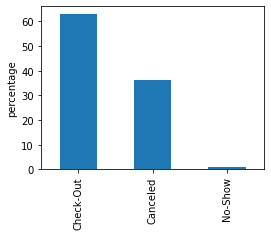

In [27]:
status_percentages.plot(kind='bar', figsize=(4,3), ylabel="percentage");

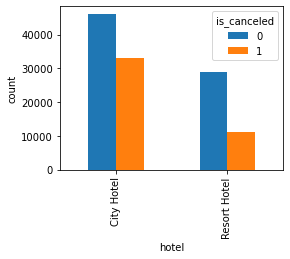

In [28]:
# Relation between hotel type and cancellations:
pd.crosstab(hotel.hotel,hotel.is_canceled).plot.bar(figsize=(4,3), ylabel="count");
plt.show()

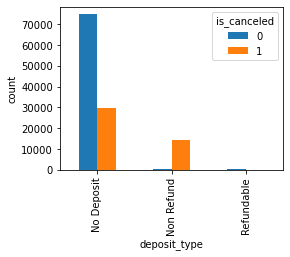

In [29]:
# Relation between deposit type and cancellations:
pd.crosstab(hotel.deposit_type,hotel.is_canceled).plot.bar(figsize=(4,3), ylabel="count");
plt.show()

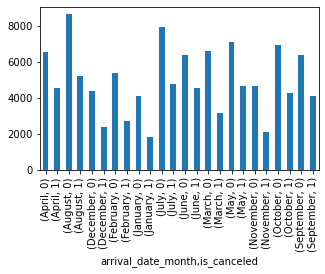

In [30]:
# Relation between reservation status (counts of 1's for canceled and counts of 0's for not canceled) and arrival month
hotel.groupby(["arrival_date_month","is_canceled"])["is_canceled"].count().plot(kind='bar',figsize=(5,3));

In [165]:
# Checking if any of the independent numerical variables are highly correlated or are describing the same thing!
corrMatrix = hotel.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')
# Some accidental correlations are observed (like stay in week vs weekend days) but overall, 
# numerical independent variables are not highly correlated.

In [32]:
corrMatrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.00000
lead_time                         0.29293
previous_cancellations            0.11015
adults                            0.05816
days_in_waiting_list              0.05431
adr                               0.04656
stays_in_week_nights              0.02555
arrival_date_year                 0.01669
arrival_date_week_number          0.00830
children                          0.00486
stays_in_weekend_nights          -0.00132
arrival_date_day_of_month        -0.00590
babies                           -0.03257
previous_bookings_not_canceled   -0.05736
is_repeated_guest                -0.08374
booking_changes                  -0.14482
required_car_parking_spaces      -0.19570
total_of_special_requests        -0.23493
Name: is_canceled, dtype: float64

In [33]:
# Variables lead_time and total_of_special_requests have the highest positive and negative 
# correlation with reservation status (is or is not canceled), respectively

In [34]:
# Relation between lead time and cancellations:
hotel.groupby(["is_canceled"])["lead_time"].mean()  # on average, canceled bookings have higher mean lead_time

is_canceled
0     80.08203
1    144.89911
Name: lead_time, dtype: float64

<AxesSubplot:xlabel='total_of_special_requests'>

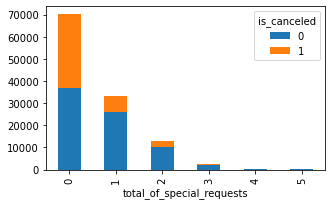

In [35]:
ct1 = pd.crosstab(hotel.total_of_special_requests, hotel.is_canceled)
ct1.plot(kind="bar", stacked=True, figsize=(5,3))   # The more the # of requests, the less the likelihood of cancellation

In [36]:
# Checking the relation between arrival year and cancellations
hotel.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='percentage').groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

percentage
arrival_date_year is_canceled            
2015              0              62.95133
                  1              37.04867
2016              0              64.10646
                  1              35.89354
2017              0              61.26539
                  1              38.73461

In [37]:
# Checking the relation between arrival month and cancellations
hotel.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='percentage').groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

percentage
arrival_date_month is_canceled            
April              0              59.21647
                   1              40.78353
August             0              62.23569
                   1              37.76431
December           0              64.96523
                   1              35.03477
February           0              66.55489
                   1              33.44511
January            0              69.49840
                   1              30.50160
July               0              62.53559
                   1              37.46441
June               0              58.51405
                   1              41.48595
March              0              67.77232
                   1              32.22768
May                0              60.29711
                   1              39.70289
November           0              68.69000
                   1              31.31000
October            0              61.90903
                   1              38.09097
September          0              60.80952
                   1              39.19048

In [38]:
# Cancellations doesn't seem to be very highly dependent on the arrival year or month.

In [39]:
# Listing the unique values in each categorical column
categorical_hotel = hotel[hotel.columns[np.array(hotel.dtypes==object)]]

for col in categorical_hotel:
  print(f"`{col}` column unique values:\n {hotel[col].unique()}\n")

`hotel` column unique values:
 ['Resort Hotel' 'City Hotel']

`arrival_date_month` column unique values:
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

`meal` column unique values:
 ['BB' 'FB' 'HB' 'SC']

`country` column unique values:
 ['PRT' 'listed_other' 'FRA' 'unknown' 'DEU']

`market_segment` column unique values:
 ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

`distribution_channel` column unique values:
 ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

`reserved_room_type` column unique values:
 ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

`assigned_room_type` column unique values:
 ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

`deposit_type` column unique values:
 ['No Deposit' 'Refundable' 'Non Refund']

`agent` column unique values:
 ['unknown' 'listed_other' '1']

`customer_type` column unique values:
 ['Transient' 'Contract' 'Transient-Party' 'Group']

`reservation_st

In [40]:
hotel.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   

   booking_changes  deposit_type    agent days_in_waiting_list customer_type  \
0                3    No Deposit  unknown                    0     Transient   
1                4    No Deposit  unknown                    0     Transient   
2                0    No Deposit  unknown                    0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  

[3 rows x 31 columns]

<a name="2.4"></a>
### 2.4 -  Feature Engineering:

In [41]:
# Subtract the reservation_status_date which is the date for most recent status update, from
# the arrival date to better identify whether a canceled case would directly translate to 
# loss of profit or not

# First, it is required to concatenate the arrival columns (year, month, day) and generate an arrival_date column
import calendar
import datetime

arrival_Df = hotel[["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]].copy()
arrival_Df.head()
months = list(calendar.month_name)


for month in months:
    arrival_Df.loc[arrival_Df["arrival_date_month"] == month, "arrival_date_month"] = months.index(month)
    
arrival_Df = arrival_Df.astype({'arrival_date_month': 'int64'})
arrival_Df.rename(columns = {'arrival_date_year':'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'}, inplace = True)
arri_date = pd.to_datetime(arrival_Df)
arrival_Df["arrival_date"] = arri_date

display(arrival_Df.head())
arrival_Df.info()

year  month  day arrival_date
0  2015      7    1   2015-07-01
1  2015      7    1   2015-07-01
2  2015      7    1   2015-07-01
3  2015      7    1   2015-07-01
4  2015      7    1   2015-07-01

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119206 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          119206 non-null  int64         
 1   month         119206 non-null  int64         
 2   day           119206 non-null  int64         
 3   arrival_date  119206 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.5 MB


In [42]:
# Temporarily adding these new columns to the hotel dataframe:
hotel["arrival_date"] = arri_date
hotel['Difference'] = (hotel['arrival_date'] - hotel['reservation_status_date']).dt.days

# Now, generating a rule for what is profit and what can be a loss of profit, based on the date differences:
# If the reservation is canceled and the deposit is non-refundable or canceled way ahead of arrival (over 200 days),
# then the hotel gains profit by forfeiting the deposit
# If the guest has already checked out, then it's a profit case!
# If it is a no-show and the deposit is non-refundable, then it's a profit case!
profit = hotel.query('(reservation_status=="Canceled" & (deposit_type == "Non Refund" | Difference > 200)) | reservation_status=="Check-Out" | (reservation_status=="No-Show" & deposit_type == "Non Refund")').copy()

# Loss is a collection of instances not captured by the above query
loss = hotel.loc[hotel.index.difference(profit.index)].copy()

# The shapes row numbers add up to the total rows 119,206
print(profit.shape)
print(loss.shape)

display(profit.head())
display(loss.head())

(91487, 33)
(27719, 33)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...         agent  \
0                        0                     0       2  ...       unknown   
1                        0                     0       2  ...       unknown   
2                        0                     1       1  ...       unknown   
3                        0                     1       1  ...  listed_other   
4                        0                     2       2  ...  listed_other   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   arrival_date Difference  
0    2015-07-01          0  
1    2015-07-01          0  
2    2015-07-01         -1  
3    2015-07-01         -1  
4    2015-07-01         -2  

[5 rows x 33 columns]

hotel  is_canceled  lead_time  arrival_date_year  \
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
27  Resort Hotel            1         60               2015   
32  Resort Hotel            1         96               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
27               July                        27                          1   
32               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...         agent  \
8                         0                     3       2  ...  listed_other   
9                         0                     3       2  ...  listed_other   
10                        0                     4       2  ...  listed_other   
27                        2                     5       2  ...  listed_other   
32                        2                     8       2  ...       unknown   

    days_in_waiting_list customer_type    adr required_car_parking_spaces  \
8                      0     Transient   82.0                           0   
9                      0     Transient  105.5                           0   
10                     0     Transient  123.0                           0   
27                     0     Transient  107.0                           0   
32                     0     Transient  108.3                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
8                          1            Canceled               2015-05-06   
9                          0            Canceled               2015-04-22   
10                         0            Canceled               2015-06-23   
27                         2            Canceled               2015-05-11   
32                         2            Canceled               2015-05-29   

    arrival_date Difference  
8     2015-07-01         56  
9     2015-07-01         70  
10    2015-07-01          8  
27    2015-07-01         51  
32    2015-07-01         33  

[5 rows x 33 columns]

In [43]:
# Creating a Revenue column for profit and loss dataframes and populating them:
profit["Revenue"] = 1
loss["Revenue"] = 0
hotel_2 = pd.concat([profit, loss], ignore_index=True)  
hotel_2 = hotel_2.sample(frac=1).reset_index(drop=True)  # Shuffle and reset index so profit and loss rows get shuffled
hotel_2.shape

(119206, 34)

In [44]:
hotel_2.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel            0        151               2016             August   
1  Resort Hotel            0          7               2017               June   
2    City Hotel            0         34               2016           February   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        32                          5   
1                        25                         23   
2                         9                         22   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        1                     2       2  ...   
1                        0                     2       2  ...   
2                        1                     2       2  ...   

   days_in_waiting_list  customer_type     adr required_car_parking_spaces  \
0                     0      Transient   72.25                           0   
1                     0      Transient  128.25                           0   
2                     0      Transient   77.60                           0   

  total_of_special_requests reservation_status  reservation_status_date  \
0                         1          Check-Out               2016-08-08   
1                         0          Check-Out               2017-06-25   
2                         2          Check-Out               2016-02-25   

   arrival_date  Difference Revenue  
0    2016-08-05          -3       1  
1    2017-06-23          -2       1  
2    2016-02-22          -3       1  

[3 rows x 34 columns]

In [45]:
hotel_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'Difference', 'Revenue'],
      dtype='object')

### I can now safely drop the columns:
**is_canceled:** because we have a new target 'Revenue' which is derived from the reservation status itself<br>
**reservation_status_date:** We used this date to engineer the target column, Revenue<br>
**arrival_date:** This was added temporarily to engineer the target column, Revenue<br>
**Difference:** This was added temporarily to see the difference between the arrival time and last status update date<br>
**reservation_status:** We used this to engineer the target column, Revenue<br>

In [46]:
# drop these columns to avoid information leakage becase the target is created using these columns:
hotel_2.drop(columns = ['is_canceled', 'reservation_status_date', 'arrival_date', 'Difference', 'reservation_status'], inplace=True)
hotel_2.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'Revenue'],
      dtype='object')

In [47]:
hotel_2.head(3)

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel        151               2016             August   
1  Resort Hotel          7               2017               June   
2    City Hotel         34               2016           February   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        32                          5   
1                        25                         23   
2                         9                         22   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       2         0  ...   
1                        0                     2       2         0  ...   
2                        1                     2       2         1  ...   

   assigned_room_type booking_changes deposit_type         agent  \
0                   A               0   No Deposit  listed_other   
1                   A               0   No Deposit  listed_other   
2                   D               0   No Deposit  listed_other   

  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  \
0                    0      Transient   72.25                            0   
1                    0      Transient  128.25                            0   
2                    0      Transient   77.60                            0   

  total_of_special_requests Revenue  
0                         1       1  
1                         0       1  
2                         2       1  

[3 rows x 29 columns]

<a name="2.5"></a>
### 2.5 Data Visualization for Target Variable

**Now, our new target variable is Revenue.**

1    76.74698
0    23.25302
Name: Revenue, dtype: float64


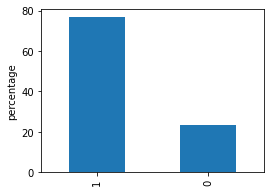

In [48]:
revenue_percentages = hotel_2["Revenue"].value_counts(normalize=True)*100
print(revenue_percentages)
revenue_percentages.plot(kind='bar', figsize=(4,3), ylabel="percentage");

In [49]:
# Create dummy variables
hotel_ssf = pd.get_dummies(hotel_2)
print(f"There are now {hotel_ssf.shape[1]} columns in hotel_ssf dataframe.")

There are now 83 columns in hotel_ssf dataframe.


In [50]:
# Among the important independent variables that are correlated to Revenue are:

In [51]:
corrMatrix = hotel_ssf.corr()
corrMatrix["Revenue"].sort_values(ascending=False)[:5]

Revenue                         1.00000
deposit_type_Non Refund         0.20554
required_car_parking_spaces     0.14034
market_segment_Offline TA/TO    0.11960
market_segment_Groups           0.10615
Name: Revenue, dtype: float64

In [52]:
corrMatrix["Revenue"].sort_values(ascending=False)[-5:]

distribution_channel_TA/TO   -0.09863
adr                          -0.12158
agent_listed_other           -0.12832
deposit_type_No Deposit      -0.20466
market_segment_Online TA     -0.24340
Name: Revenue, dtype: float64

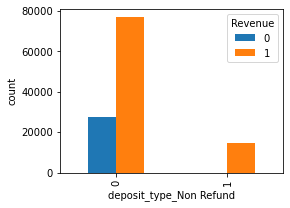

In [53]:
pd.crosstab(hotel_ssf["deposit_type_Non Refund"],hotel_ssf.Revenue).plot.bar(figsize=(4,3), ylabel="count");
plt.show()

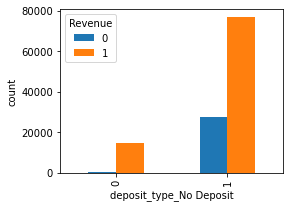

In [54]:
pd.crosstab(hotel_ssf["deposit_type_No Deposit"],hotel_ssf.Revenue).plot.bar(figsize=(4,3), ylabel="count");
plt.show()

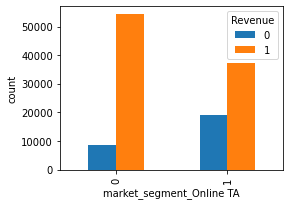

In [55]:
pd.crosstab(hotel_ssf["market_segment_Online TA"],hotel_ssf.Revenue).plot.bar(figsize=(4,3), ylabel="count");
plt.show()

---

#### Preparing the data and labels for classification

In [57]:
# Data:    << hotel_ssf>>    is all numeric (includes dummy variables)
# Recall that hotel_2 still includes categorical variables that are not converted to dummies

# separate the Revenue column to be used as the target:
y = hotel_ssf["Revenue"]

X_ssf = hotel_ssf.drop(["Revenue"], axis=1)

In [58]:
# Creating a reduced version of the matrix X and label y to test run the classifiers easily

hotel_ssf_redu = hotel_ssf.sample(frac=0.12).reset_index(drop=True) #using only a fraction of rows
y = hotel_ssf_redu["Revenue"]
X_ssf = hotel_ssf_redu.drop(["Revenue"], axis=1)

1    76.28102
0    23.71898
Name: Revenue, dtype: float64


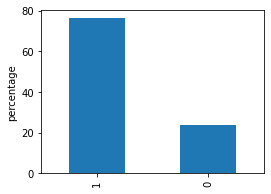

In [59]:
revenue_percentages = hotel_ssf_redu["Revenue"].value_counts(normalize=True)*100
print(revenue_percentages)
revenue_percentages.plot(kind='bar', figsize=(4,3), ylabel="percentage");

<a name="3"></a>
## 3 - Supervised Knowledge Discovery

<a name="3.1"></a>
### 3.1 KNN

> #### First split, then train the minmax scalar on train set only; then use it to transform test:

In [60]:
from sklearn.model_selection import train_test_split
#Using 80/20 split
train, test, target_train, target_test = train_test_split(X_ssf, y, test_size=0.2, random_state=33) 

from sklearn import preprocessing
#Normalizing the data
min_max_scaler = preprocessing.MinMaxScaler().fit(train)
#Min-Max normalization to scale all the variables between 0 & 1
train_norm = min_max_scaler.transform(train)
train_norm = pd.DataFrame(train_norm, columns=train.columns, index=train.index)

test_norm = min_max_scaler.transform(test)
test_norm = pd.DataFrame(test_norm, columns=test.columns, index=test.index)

target = y

train = train_norm
test= test_norm

In [61]:
train.shape

(11444, 82)

In [62]:
test.shape

(2861, 82)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
#Intializing KNN classifier
clf = neighbors.KNeighborsClassifier()    
#Parameters for grid search (values of k=1, k=3, k=5, k=7, k=9)
parameters = {'n_neighbors': [1,3,5,7,9]}          
#Initializing the grid search with specified parameters & 5-fold cross-validation
gs = GridSearchCV(clf, parameters, verbose=1, cv=5)   

In [64]:
tar_train = target_train.astype('int32')

In [65]:
tar_test = target_test.astype('int32')

In [66]:
#Performing the grid search on the training data
gs.fit(train, tar_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, verbose=1)

In [67]:
for (i, j) in gs.best_params_.items():
    print ("The optimal value of", i, "is:", j)
print()
print("The best cross-validation accuracy on the training data was: {}".format(gs.best_score_))

The optimal value of n_neighbors is: 7

The best cross-validation accuracy on the training data was: 0.7637194609671674


In [124]:
from sklearn.metrics import classification_report
#Initializing with k=7
clf = neighbors.KNeighborsClassifier(n_neighbors=7)  
#Fitting the training data 
clf.fit(train, tar_train) 
#Predict classes of test set
pred_test_target = clf.predict(test)   
#Print classification report
print(classification_report(tar_test, pred_test_target))  

              precision    recall  f1-score   support

           0       0.55      0.42      0.48       702
           1       0.82      0.89      0.85      2159

    accuracy                           0.77      2861
   macro avg       0.69      0.65      0.66      2861
weighted avg       0.76      0.77      0.76      2861



In [145]:
from sklearn.model_selection import cross_val_score

clf = neighbors.KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(clf4, train, tar_train, cv=10)

print(f"\nCross validation scores:\n{cv_scores}")
print("\n Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

clf.fit(train, tar_train)
print("\n Accuracy on Training: ",  clf4.score(train, tar_train))

clf.fit(test, tar_test)
print("\n Accuracy on Testing: ",  clf4.score(test, tar_test))


Cross validation scores:
[0.76157 0.78865 0.78253 0.79127 0.77797 0.78147 0.80332 0.77448 0.79458
 0.79808]

 Overall Accuracy on X-Val: 0.79 (+/- 0.02)

 Accuracy on Training:  0.932278923453338

 Accuracy on Testing:  0.787836420831877


<a name="3.2"></a>
### 3.2 Decision Trees

In [69]:
# Splitting the data into train(80%) and test(20%) sets:
from sklearn.model_selection import train_test_split

train1, test1, target_train1, target_test1 = train_test_split(X_ssf, y, test_size=0.2, random_state=33)

In [70]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [71]:
treeclf = treeclf.fit(train1, target_train1)

In [72]:
treepreds_test = treeclf.predict(test1)
print(treepreds_test)

[0 0 1 ... 1 1 1]


In [73]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,plot_confusion_matrix


print(classification_report(target_test1, treepreds_test))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       702
           1       0.87      0.86      0.87      2159

    accuracy                           0.80      2861
   macro avg       0.73      0.74      0.74      2861
weighted avg       0.80      0.80      0.80      2861



In [74]:
treecm = confusion_matrix(target_test1, treepreds_test)
print(treecm)

[[ 432  270]
 [ 298 1861]]


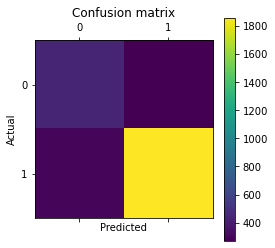

In [75]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
pr = treeclf.predict_proba(test1)

In [77]:
import sklearn.metrics as metrics
prd = pr[:,1]
FalsePR, TruePR, threshold = metrics.roc_curve(target_test1, prd)
auc = metrics.auc(FalsePR, TruePR)

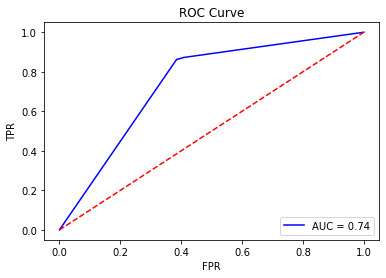

In [78]:
plt.title('ROC Curve')
plt.plot(FalsePR, TruePR, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [79]:
treepreds_train = treeclf.predict(train1)
print(treepreds_train)

[1 1 0 ... 1 1 1]


In [80]:
print(classification_report(target_train1, treepreds_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2691
           1       1.00      0.99      1.00      8753

    accuracy                           0.99     11444
   macro avg       0.99      0.99      0.99     11444
weighted avg       0.99      0.99      0.99     11444



In [81]:
treecm1 = confusion_matrix(target_train1, treepreds_train)
print(treecm1)

[[2685    6]
 [  76 8677]]


In [82]:
print (treeclf.score(train1, target_train1))

0.9928346731911919


In [83]:
print (treeclf.score(test1, target_test1))

0.8014680181754631


In [84]:
#Grid Search
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10, dtype=int),
    'min_samples_leaf': np.linspace(1, 30, 15, dtype=int),
    'min_samples_split': np.linspace(2, 20, 10, dtype=int)
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [85]:
%time _ = gs.fit(train1, target_train1)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
CPU times: user 8min 5s, sys: 1.19 s, total: 8min 6s
Wall time: 8min 7s


({'criterion': 'entropy',
  'max_depth': 11,
  'min_samples_leaf': 17,
  'min_samples_split': 4},
 0.8218290501547383)

In [87]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")


In [88]:
dtGS = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=17, min_samples_split=4)

dtGS.fit(train1, target_train1)
measure_performance(test1, target_test1, dtGS, show_confussion_matrix=False, show_classification_report=True)

Accuracy:0.810 

Classification report
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       702
           1       0.86      0.90      0.88      2159

    accuracy                           0.81      2861
   macro avg       0.74      0.72      0.73      2861
weighted avg       0.80      0.81      0.80      2861
 



In [146]:
from sklearn.model_selection import cross_val_score

treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=17, min_samples_split=4)
cv_scores = cross_val_score(treeclf, train1, target_train1, cv=10)

print(f"\nCross validation scores:\n{cv_scores}")
print("\n Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(train1, target_train1)
print("\n Accuracy on Training: ",  treeclf.score(train1, target_train1))

treeclf = treeclf.fit(test1, target_test1)
print("\n Accuracy on Testing: ",  treeclf.score(test1, target_test1))


Cross validation scores:
[0.81048 0.82707 0.81135 0.80961 0.81294 0.81469 0.81031 0.82168 0.8278
 0.83129]

 Overall Accuracy on X-Val: 0.82 (+/- 0.02)

 Accuracy on Training:  0.8405277874868927

 Accuracy on Testing:  0.8276826284515904


In [89]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names=train1.columns)

In [164]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format = "png")

In [160]:
dot_data = tree.export_graphviz(treeclf,out_file=None,feature_names=train1.columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)

'image.pdf'

<a name="3.3"></a>
### 3.3 SVM

In [91]:
from sklearn.svm import SVC
# initialize svm classifier with balanced class weights
clf4 = SVC(class_weight='balanced', tol=1e-2, cache_size= 600)                  
# grid search parameters
parameters = {'gamma': [0.1, .25, .4, .5, .7], 'C': [20, 40, 50, 75, 100], 'kernel': ['rbf', 'linear']}
# initialize grid search with 3-fold cv
gs4 = GridSearchCV(clf4, parameters, verbose=1, cv=3)

In [93]:
#Perform grid search on sample
gs4.fit(train, target_train)   

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3,
             estimator=SVC(cache_size=600, class_weight='balanced', tol=0.01),
             param_grid={'C': [20, 40, 50, 75, 100],
                         'gamma': [0.1, 0.25, 0.4, 0.5, 0.7],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [94]:
for (i, j) in gs4.best_params_.items():
    print ("The optimal value of", i, "is:", j)
print()
print("The best cross-validation accuracy on the sample data was: {}".format(gs4.best_score_))

The optimal value of C is: 100
The optimal value of gamma is: 0.4
The optimal value of kernel is: rbf

The best cross-validation accuracy on the sample data was: 0.7862638234936336


In [125]:
#Initializing svm classifier with optimal parameters
clf4 = SVC(kernel='rbf', gamma =.4, C=100, class_weight='balanced') 
#Fit on training data
clf4.fit(train, target_train)   
#Predict classes of test set
pred_test_target = clf4.predict(test)
#Printing the classification report
print(classification_report(target_test, pred_test_target))  # print classification report

              precision    recall  f1-score   support

           0       0.55      0.68      0.61       702
           1       0.89      0.82      0.85      2159

    accuracy                           0.79      2861
   macro avg       0.72      0.75      0.73      2861
weighted avg       0.81      0.79      0.79      2861



In [147]:
from sklearn.model_selection import cross_val_score

clf4 = SVC(kernel='rbf', gamma =.7, C=100, class_weight='balanced') 
cv_scores = cross_val_score(clf4, train, target_train, cv=5)

print(f"\nCross validation scores:\n{cv_scores}")
print("\n Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

clf4.fit(train, target_train) 
print("\n Accuracy on Training: ",  clf4.score(train, target_train))

clf4.fit(test, target_test)
print("\n Accuracy on Testing: ",  clf4.score(test, target_test))


Cross validation scores:
[0.77632 0.78681 0.7903  0.782   0.79065]

 Overall Accuracy on X-Val: 0.79 (+/- 0.01)

 Accuracy on Training:  0.9529010835372247

 Accuracy on Testing:  0.9849702901083537


<a name="3.4"></a>
### 3.4 Naive Bayes

In [96]:
# Building a Naive Bayes classifier:
    
    # Notes:
    # 1-GaussianNB assumes distributions are normal 
    # 2-normalization is not needed for this classifier

from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score  # for cross-validation
from sklearn.metrics import classification_report
    
nbclf = naive_bayes.GaussianNB()  
nbclf = nbclf.fit(train, target_train)
print("Score on Training: ", nbclf.score(train, target_train))
print("Score on Test: ", nbclf.score(test, target_test))

# perform 10-fold cross-validation on the 80% training data
cv_scores = cross_val_score(nbclf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")

# report the overall average accuracy.
print("\nOverall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))

# Compare the cv accuracy to the model accuracy on the train data as a whole. 
print("\nAccuracy on Training: ",  nbclf.score(train, target_train))

# run your model on the set-aside 20% test data
nbpreds_test = nbclf.predict(test)
print("\nAccuracy on 20% test set: ",  nbclf.score(test, target_test))
print("\n\nclassification report:\n")
print(classification_report(target_test, nbpreds_test))

Score on Training:  0.4556099265990912
Score on Test:  0.4627752534078993

Cross validation scores:
[0.45066 0.45328 0.44192 0.44891 0.46241 0.44843 0.46766 0.46154 0.45717
 0.46416]

Overall Accuracy: 0.46 (+/- 0.02)

Accuracy on Training:  0.4556099265990912

Accuracy on 20% test set:  0.4627752534078993


classification report:

              precision    recall  f1-score   support

           0       0.31      0.97      0.47       702
           1       0.97      0.30      0.45      2159

    accuracy                           0.46      2861
   macro avg       0.64      0.64      0.46      2861
weighted avg       0.81      0.46      0.46      2861



In [97]:
# Hyperparameter tuning for Naive Bayes:
from sklearn.model_selection import GridSearchCV

parameters = {'var_smoothing': (1e-9,1e-7, 1e-5, 1e-4,1e-2)}

gs = GridSearchCV(nbclf, parameters, scoring = 'accuracy', cv=10)

In [98]:
_ = gs.fit(train, target_train)

gs.best_params_, gs.best_score_

({'var_smoothing': 0.01}, 0.5263936391119797)

In [99]:
# Creating the best model based on the above grid search results:

best_nbclf = naive_bayes.GaussianNB(var_smoothing= 0.01)  
best_nbclf = best_nbclf.fit(train, target_train)
print("Score on Training: ", best_nbclf.score(train, target_train))
print("Score on Test: ", best_nbclf.score(test, target_test))

# perform 10-fold cross-validation on the 80% training data
cv_scores = cross_val_score(best_nbclf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")

# report the overall average accuracy.
print("\nOverall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))

# Compare the cv accuracy to the model accuracy on the train data as a whole. 
print("\nAccuracy on Training: ",  best_nbclf.score(train, target_train))

# run your model on the set-aside 20% test data
best_nbclf_test = best_nbclf.predict(test)
print("\nAccuracy on 20% test set: ",  best_nbclf.score(test, target_test))
print("\n\nclassification report:\n")
print(classification_report(target_test, best_nbclf_test))

Score on Training:  0.5297972736805313
Score on Test:  0.5456134218804614

Cross validation scores:
[0.50917 0.51703 0.52664 0.50393 0.54983 0.53584 0.53846 0.52448 0.52273
 0.53584]

Overall Accuracy: 0.53 (+/- 0.03)

Accuracy on Training:  0.5297972736805313

Accuracy on 20% test set:  0.5456134218804614


classification report:

              precision    recall  f1-score   support

           0       0.34      0.87      0.48       702
           1       0.91      0.44      0.59      2159

    accuracy                           0.55      2861
   macro avg       0.62      0.66      0.54      2861
weighted avg       0.77      0.55      0.57      2861



In [100]:
# Usin the grid search results (var_smoothing= 1e-07) slightly increased the accuracy on train and test

[[ 611   91]
 [1209  950]]


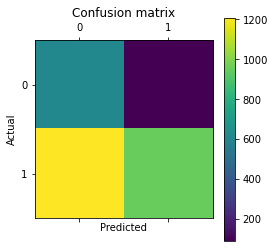

In [101]:
from sklearn.metrics import confusion_matrix
# generate the confusion matrix
nbcm = confusion_matrix(target_test, best_nbclf_test)
print(nbcm)
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();

**Multinomial Naive Bayes**

We used Multinomial Naive Bayes which we assumed would work slightly better on our mostly discrete dataset. However, that classifier did not provide a higher accuracy either, so we skipped the parameter tuning step for it.

In [102]:
nbmclf = naive_bayes.MultinomialNB()   
nbmclf = nbclf.fit(train, target_train)

# 10-fold cross-validation on the training data
cv_scores = cross_val_score(nbmclf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")

# Overall average accuracy.
print("\nOverall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))

# Compare the cv accuracy to the model accuracy on the train data as a whole. 
print("\nAccuracy on Training: ",  nbmclf.score(train, target_train))

# run your model on the set-aside test data
nbmclf_test = nbmclf.predict(test)
print("\nAccuracy on test set: ",  nbmclf.score(test, target_test))
print("\n\nclassification report:\n")
print(classification_report(target_test, nbmclf_test))


Cross validation scores:
[0.45066 0.45328 0.44192 0.44891 0.46241 0.44843 0.46766 0.46154 0.45717
 0.46416]

Overall Accuracy: 0.46 (+/- 0.02)

Accuracy on Training:  0.4556099265990912

Accuracy on test set:  0.4627752534078993


classification report:

              precision    recall  f1-score   support

           0       0.31      0.97      0.47       702
           1       0.97      0.30      0.45      2159

    accuracy                           0.46      2861
   macro avg       0.64      0.64      0.46      2861
weighted avg       0.81      0.46      0.46      2861



<a name="3.5"></a>
### 3.5 linear discriminant analysis

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # it is a classifier (supervised)

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, target_train)
ldpreds_test = ldclf.predict(test)

# 10-fold cross-validation on the training data
cv_scores = cross_val_score(ldclf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")

# Overall average accuracy.
print("\nOverall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))

# Compare the cv accuracy to the model accuracy on the train data as a whole. 
print("\nAccuracy on Training: ",  ldclf.score(train, target_train))

# run your model on the set-aside test data
ldclf_test = ldclf.predict(test)
print("\nAccuracy on test set: ",  ldclf.score(test, target_test))
print("\n\nclassification report:\n")
print(classification_report(target_test, ldclf_test))


Cross validation scores:
[0.78865 0.7869  0.78865 0.79476 0.77797 0.76486 0.78234 0.78234 0.79196
 0.7771 ]

Overall Accuracy: 0.78 (+/- 0.02)

Accuracy on Training:  0.7866130723523244

Accuracy on test set:  0.7790982174065012


classification report:

              precision    recall  f1-score   support

           0       0.59      0.32      0.41       702
           1       0.81      0.93      0.86      2159

    accuracy                           0.78      2861
   macro avg       0.70      0.62      0.64      2861
weighted avg       0.75      0.78      0.75      2861



In [104]:
# hyperparameter tuning for LDA:
# The most important parameter to tune in LDA is the solver:

parameters = {'solver': ['svd', 'lsqr']}  
gs = GridSearchCV(ldclf, parameters, scoring='accuracy', cv=10)
gs_res = gs.fit(train, target_train)

gs_res.best_params_, gs_res.best_score_

({'solver': 'svd'}, 0.7835525391638928)

In [105]:
# Checkig if auto Shrinkage combined with the two other solvers provides a higher accuracy:
# Side note: svd only works with shrinkage=None

ldclf_2 = LinearDiscriminantAnalysis(shrinkage='auto')
parameters_2 = {'solver': ('lsqr','eigen')} 

gs = GridSearchCV(ldclf_2, parameters_2, scoring='accuracy', cv=10)
gs_res = gs.fit(train, target_train)

gs_res.best_params_, gs_res.best_score_

({'solver': 'lsqr'}, 0.778136317830641)

In [106]:
# Creating the best model based on the above grid search results: svd results in a higher accuracy
# We get the same results as the model without parameter tuning because svd is the default solver
best_ldclf = LinearDiscriminantAnalysis(solver='svd')
best_ldclf = best_ldclf.fit(train, target_train)
ldpreds_test = best_ldclf.predict(test)

# 10-fold cross-validation on the training data
cv_scores = cross_val_score(best_ldclf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")

# Overall average accuracy.
print("\nOverall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))

# Compare the cv accuracy to the model accuracy on the train data as a whole. 
print("\nAccuracy on Training: ",  best_ldclf.score(train, target_train))

# run your model on the set-aside test data
best_ldclf_test = best_ldclf.predict(test)
print("\nAccuracy on test set: ",  best_ldclf.score(test, target_test))
print("\n\nclassification report:\n")
print(classification_report(target_test, best_ldclf_test))


Cross validation scores:
[0.78865 0.7869  0.78865 0.79476 0.77797 0.76486 0.78234 0.78234 0.79196
 0.7771 ]

Overall Accuracy: 0.78 (+/- 0.02)

Accuracy on Training:  0.7866130723523244

Accuracy on test set:  0.7790982174065012


classification report:

              precision    recall  f1-score   support

           0       0.59      0.32      0.41       702
           1       0.81      0.93      0.86      2159

    accuracy                           0.78      2861
   macro avg       0.70      0.62      0.64      2861
weighted avg       0.75      0.78      0.75      2861



In [107]:
# Above is the same accuracy as the model with no parameter tuning because svd is the default solver.

In [108]:
# generate the confusion matrix
ldcm = confusion_matrix(target_test, best_ldclf_test)
print(ldcm)

[[ 222  480]
 [ 152 2007]]


<a name="3.6"></a>
### 3.6 Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [110]:
def grid_search(X_tr, X_te, y_tr, y_te, model, params, scoring='recall'):
    gs = GridSearchCV(estimator = model, param_grid = params, scoring = scoring, n_jobs=-1, cv=3)
    gs.fit(X_tr, y_tr)
    y_pred = gs.predict(X_te)
    print(f"{model}")
    print(f"Best parameter      : {gs.best_params_}")
    print(f"Test Accuracy Score : {accuracy_score(y_te, y_pred)}")
    print(f"Train Accuracy Score: {accuracy_score(y_tr, gs.predict(X_tr))}")
    print(f"Recall score        : {recall_score(y_te, y_pred)}")
    print(f"Classification Report \n{'-'*30}\n {classification_report(y_te, y_pred)}")
    return gs.best_params_

In [111]:
params = {
    'n_estimators':[100, 200, 300, 400, 500, 600],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20],
}
model = RandomForestClassifier(random_state=33)
rf_best = grid_search(train, test, target_train, target_test, model, params, scoring='accuracy')

RandomForestClassifier(random_state=33)
Best parameter      : {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 600}
Test Accuracy Score : 0.8413142257951766
Train Accuracy Score: 0.9580566235581964
Recall score        : 0.9467345993515517
Classification Report 
------------------------------
               precision    recall  f1-score   support

           0       0.76      0.52      0.62       702
           1       0.86      0.95      0.90      2159

    accuracy                           0.84      2861
   macro avg       0.81      0.73      0.76      2861
weighted avg       0.83      0.84      0.83      2861



In [141]:
rf = RandomForestClassifier(n_estimators=rf_best['n_estimators'], criterion=rf_best['criterion'], max_depth=rf_best['max_depth'], 
                                  random_state=33)

In [144]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, train, target_train, cv=10)
print(f"\nCross validation scores:\n{cv_scores}")
print("\n Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

rf = rf.fit(train, target_train)
print("\n Accuracy on Training: ",  rf.score(train, target_train))

rf = rf.fit(test, target_test)
print("\n Accuracy on Testing: ",  rf.score(test, target_test))


Cross validation scores:
[0.84192 0.8559  0.83668 0.85066 0.84441 0.86276 0.83916 0.84878 0.8479
 0.85839]

 Overall Accuracy on X-Val: 0.85 (+/- 0.02)

 Accuracy on Training:  0.9580566235581964

 Accuracy on Testing:  0.9954561342188046


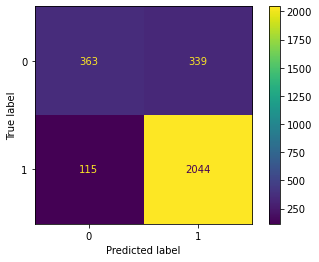

In [113]:
plot_confusion_matrix(rf, test, target_test)
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

<a name="4"></a>
## 4 - Unsupervised Knowledge Discovery

<a name="4.1"></a>
### 4.1 Clustering

In [114]:
# Min-Max normalization:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_ssf)    

In [115]:
# plot_silhouettes function from class example:
# https://nbviewer.org/url/bmobasher.com/Class/CSC478/Clustering.ipynb

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 
    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    pl.tight_layout()
    pl.show();
    
    return

In [116]:
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import silhouette_samples

def cluster_analysis(data, column_names, target, plot_silhouettes, k=7):
    "A function that does clustering analysis on data"
    
    DF = pd.DataFrame(data, columns=column_names)
    kms = KMeans(n_clusters=k, max_iter=500, verbose=0, n_init=5, random_state=33) 
    kms.fit(DF)
    clusters = kms.predict(data)   
    clusters = clusters.astype(int)
    
    cluster_num, size = np.unique(clusters, return_counts=True)
    print("\n"+"-"*10+"Cluster Analysis"+"-"*10+"\n")
    print(f"Number of clusters: {k}")
    
    centroids = pd.DataFrame(kms.cluster_centers_, columns=column_names)
    silhouettes = metrics.silhouette_samples(data, clusters)
    
    for i in range(len(cluster_num)):
        print("Size of Cluster", cluster_num[i], "= ", size[i])
    
    print("\nCluster centroids:")
#     pd.set_option('max_columns', None)
    display(centroids)
    print("\nSilhouette plot:")
    plot_silhouettes(data, clusters)
    
    print("\n\nMean Silhouette Value: ", silhouettes.mean())
    complete = completeness_score(target,clusters)
    print("Completeness score: ", complete)
    homogen = homogeneity_score(target,clusters)
    print("Homogeneity score: ",homogen,"\n")
    
    return silhouettes, complete, homogen, clusters, centroids


----------Cluster Analysis----------

Number of clusters: 2
Size of Cluster 0 =  6104
Size of Cluster 1 =  8201

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.17278            0.48648                   0.52169   
1    0.11522            0.64181                   0.48953   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.49641                  0.04530               0.05394   
1                    0.49122                  0.06727               0.06863   

    adults  children   babies  is_repeated_guest  ...  \
0  0.06369   0.01092  0.00377            0.06193  ...   
1  0.07260   0.05361  0.00451            0.01097  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.71494                  0.28244                  0.00262   
1                  0.99902                  0.00085                  0.00012   

   agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  0.14007             0.55013        0.30980                 0.03539   
1  0.00012             0.98549        0.01439                 0.03487   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0              0.00508                  0.56062                        0.39892  
1              0.00573                  0.90416                        0.05524  

[2 rows x 82 columns]


Silhouette plot:


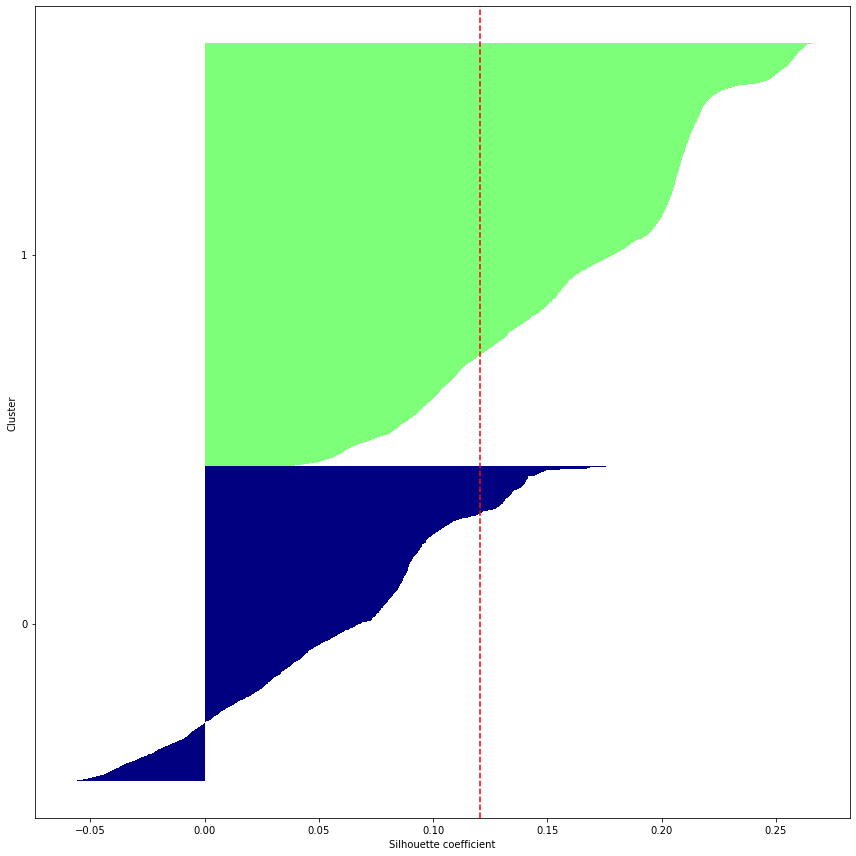



Mean Silhouette Value:  0.120709553994198
Completeness score:  0.020741610562666327
Homogeneity score:  0.02583576722378519 


----------Cluster Analysis----------

Number of clusters: 3
Size of Cluster 0 =  2561
Size of Cluster 1 =  7629
Size of Cluster 2 =  4115

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.07422            0.57536                   0.49854   
1    0.11597            0.63618                   0.49156   
2    0.22464            0.46333                   0.52783   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.50138                  0.04617               0.05489   
1                    0.48884                  0.06681               0.06832   
2                    0.49701                  0.04867               0.05599   

    adults  children   babies  is_repeated_guest  ...  \
0  0.06245   0.03918  0.00957            0.12612  ...   
1  0.07258   0.05158  0.00413            0.00983  ...   
2  0.06575   0.00308  0.00097            0.01700  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.96017                  0.03592                  0.00390   
1                  0.99974                  0.00013                  0.00013   
2                  0.60078                  0.39777                  0.00146   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0 -6.93889e-18             0.34752        0.65248                 0.00195   
1  2.62261e-04             0.99607        0.00367                 0.03383   
2  2.07382e-01             0.71734        0.07528                 0.05804   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0              0.00976                  0.79032                        0.19797  
1              0.00551                  0.90454                        0.05612  
2              0.00267                  0.46503                        0.47426  

[3 rows x 82 columns]


Silhouette plot:


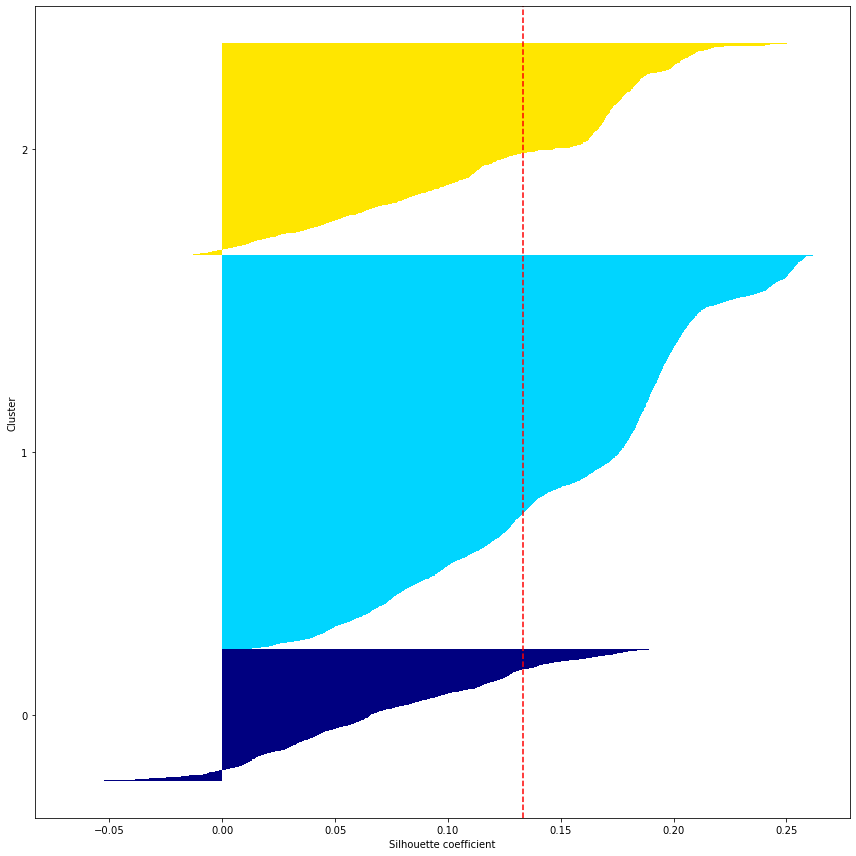



Mean Silhouette Value:  0.1334278627385949
Completeness score:  0.016093857919452847
Homogeneity score:  0.029426563177585862 


----------Cluster Analysis----------

Number of clusters: 4
Size of Cluster 0 =  3812
Size of Cluster 1 =  4263
Size of Cluster 2 =  2459
Size of Cluster 3 =  3771

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.23049            0.46392                   0.52652   
1    0.11818            0.64024                   0.49343   
2    0.07233            0.57035                   0.49914   
3    0.11651            0.61854                   0.49352   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.49815                  0.04579               0.05357   
1                    0.48679                  0.06319               0.06500   
2                    0.50194                  0.04532               0.05388   
3                    0.49065                  0.07234               0.07380   

    adults  children   babies  is_repeated_guest  ...  \
0  0.06565   0.00271  0.00092            0.01679  ...   
1  0.06894   0.01814  0.00328            0.00891  ...   
2  0.06204   0.03985  0.00956            0.12973  ...   
3  0.07622   0.08503  0.00504            0.01246  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.57203              4.26397e-01              1.57439e-03   
1                  0.99977             -7.21645e-16              2.34522e-04   
2                  0.96218              3.37536e-02              4.06669e-03   
3                  0.99390              6.09918e-03              2.16840e-18   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  2.21202e-01             0.69877        0.08003                 0.02781   
1  5.27356e-16             0.99578        0.00422                 0.05535   
2 -5.55112e-17             0.32574        0.67426                 0.00203   
3  3.44736e-03             0.98913        0.00743                 0.04110   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0              0.00105                  0.47442                        0.49672  
1              0.00610                  0.89329                        0.04526  
2              0.00976                  0.78406                        0.20415  
3              0.00636                  0.87298                        0.07955  

[4 rows x 82 columns]


Silhouette plot:


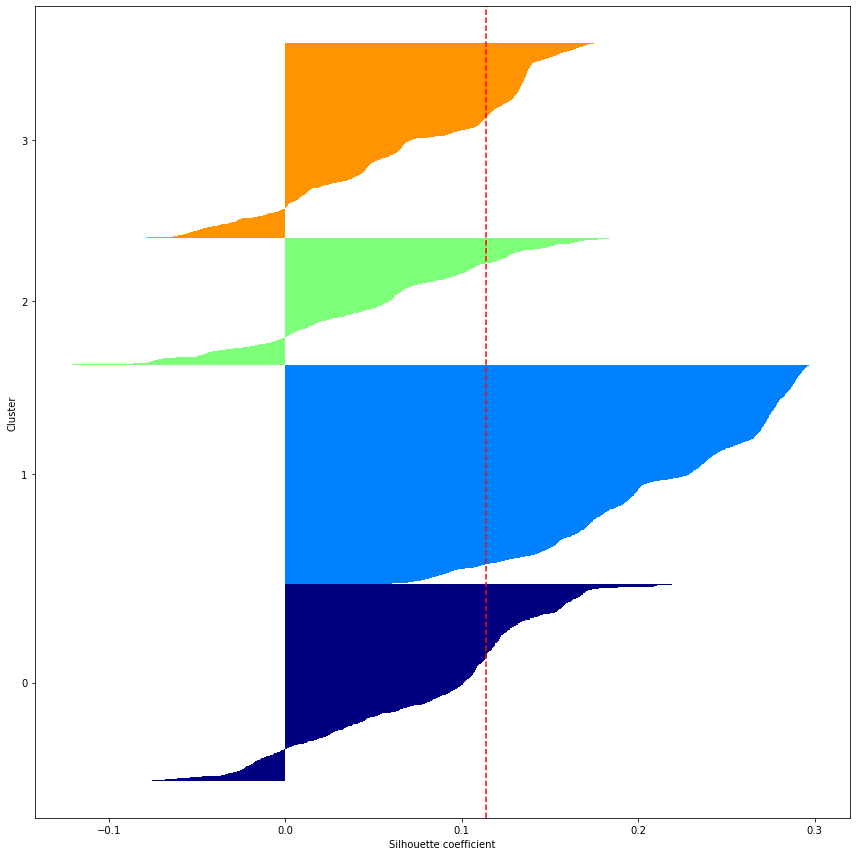



Mean Silhouette Value:  0.11352242091907526
Completeness score:  0.011107883199360064
Homogeneity score:  0.02772500571421824 


----------Cluster Analysis----------

Number of clusters: 5
Size of Cluster 0 =  2485
Size of Cluster 1 =  4111
Size of Cluster 2 =  1637
Size of Cluster 3 =  3681
Size of Cluster 4 =  2391

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.19024            0.42696                   0.54180   
1    0.11382            0.64461                   0.49250   
2    0.28447            0.53696                   0.49554   
3    0.11518            0.61994                   0.49338   
4    0.07079            0.56922                   0.50216   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.50168                  0.05609               0.06003   
1                    0.48742                  0.06060               0.06256   
2                    0.48962                  0.03955               0.05264   
3                    0.49083                  0.07238               0.07366   
4                    0.50185                  0.04538               0.05371   

    adults  children       babies  is_repeated_guest  ...  \
0  0.06473   0.00550  1.20724e-03            0.02374  ...   
1  0.06894   0.01824  3.40550e-03            0.00851  ...   
2  0.06690   0.00020  1.38778e-17            0.00611  ...   
3  0.07640   0.08666  5.02581e-03            0.01222  ...   
4  0.06238   0.04113  1.02468e-02            0.13342  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.97787              2.01207e-02              2.01207e-03   
1                  0.99976             -7.91034e-16              2.43250e-04   
2                  0.00489              9.95113e-01             -2.81893e-18   
3                  0.99674              3.25998e-03              1.30104e-18   
4                  0.97867              1.67294e-02              4.60059e-03   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  1.52918e-01             0.78994        0.05714                 0.05875   
1  2.43250e-04             0.99514        0.00462                 0.03503   
2  2.88943e-01             0.57605        0.13500                 0.03787   
3  5.43331e-04             0.99321        0.00625                 0.03939   
4 -1.11022e-16             0.32915        0.67085                 0.00209   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0          4.42656e-03                  0.14286                        0.79396  
1          5.10825e-03                  0.92654                        0.03333  
2          1.04083e-17                  0.92242                        0.03971  
3          6.24830e-03                  0.88346                        0.07090  
4          9.61941e-03                  0.79925                        0.18904  

[5 rows x 82 columns]


Silhouette plot:


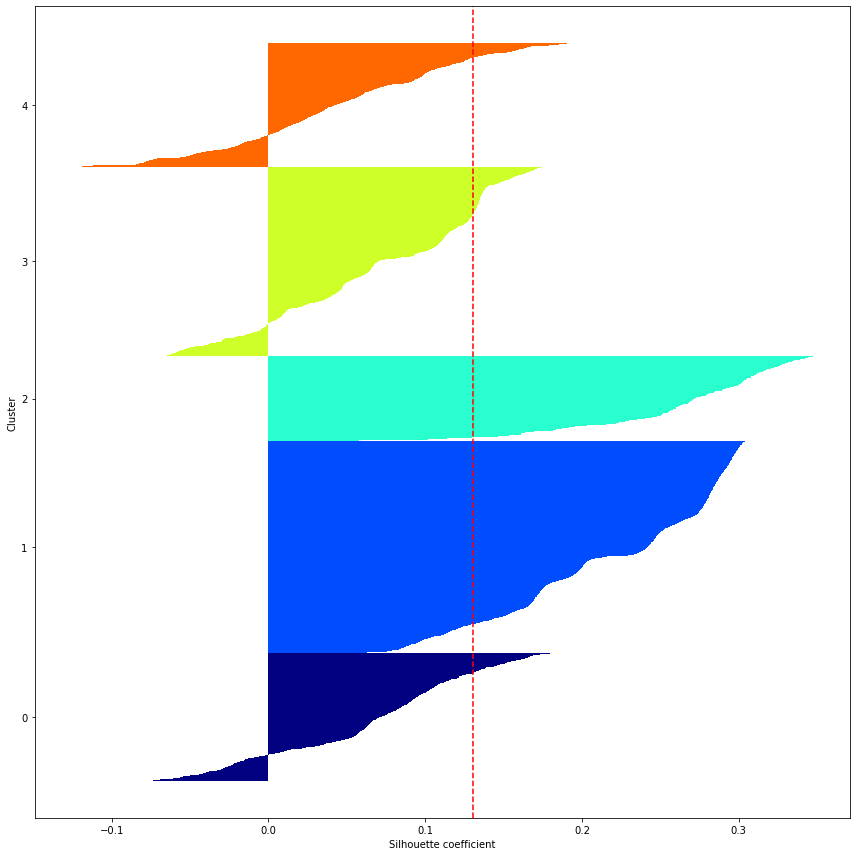



Mean Silhouette Value:  0.1304795384489958
Completeness score:  0.02564862841455512
Homogeneity score:  0.07298119283366054 


----------Cluster Analysis----------

Number of clusters: 6
Size of Cluster 0 =  2023
Size of Cluster 1 =  2340
Size of Cluster 2 =  1762
Size of Cluster 3 =  2577
Size of Cluster 4 =  3256
Size of Cluster 5 =  2347

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.20102            0.41024                   0.54616   
1    0.12078            0.56728                   0.50499   
2    0.27101            0.53462                   0.49629   
3    0.11784            0.64435                   0.49196   
4    0.11080            0.65617                   0.48892   
5    0.07175            0.56945                   0.50206   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.50396                  0.04680               0.05261   
1                    0.49244                  0.08260               0.08334   
2                    0.49274                  0.04054               0.05241   
3                    0.49164                  0.07007               0.07201   
4                    0.48393                  0.05595               0.05695   
5                    0.50107                  0.04516               0.05424   

    adults  children       babies  is_repeated_guest  ...  \
0  0.06424   0.00445  7.41840e-04            0.01731  ...   
1  0.07086   0.06578  8.11619e-03            0.02179  ...   
2  0.06691   0.00114  1.56125e-17            0.00908  ...   
3  0.07793   0.06881  2.91036e-03            0.00893  ...   
4  0.06860   0.02058  2.30344e-03            0.00768  ...   
5  0.06233   0.04133  1.04389e-02            0.13549  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.97329              2.42334e-02              2.47280e-03   
1                  1.00000             -5.13478e-16             -3.03577e-18   
2                  0.07605              9.23950e-01             -2.60209e-18   
3                  0.99573              4.26853e-03             -3.03577e-18   
4                  0.99969             -6.93889e-16              3.07125e-04   
5                  0.97699              1.83213e-02              4.68683e-03   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  1.87933e-01             0.74184        0.07023                 0.01879   
1 -1.45717e-16             0.99231        0.00769                 0.05382   
2  2.68445e-01             0.60670        0.12486                 0.03519   
3  7.76096e-04             0.99302        0.00621                 0.04734   
4  3.07125e-04             0.99539        0.00430                 0.04607   
5 -1.31839e-16             0.31870        0.68130                 0.00170   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0          1.48368e-03                  0.01632                        0.96340  
1          5.55318e-03                  0.86758                        0.07305  
2          6.93889e-18                  0.92679                        0.03802  
3          8.14901e-03                  0.87776                        0.06674  
4          5.22113e-03                  0.92045                        0.02826  
5          1.02258e-02                  0.80145                        0.18662  

[6 rows x 82 columns]


Silhouette plot:


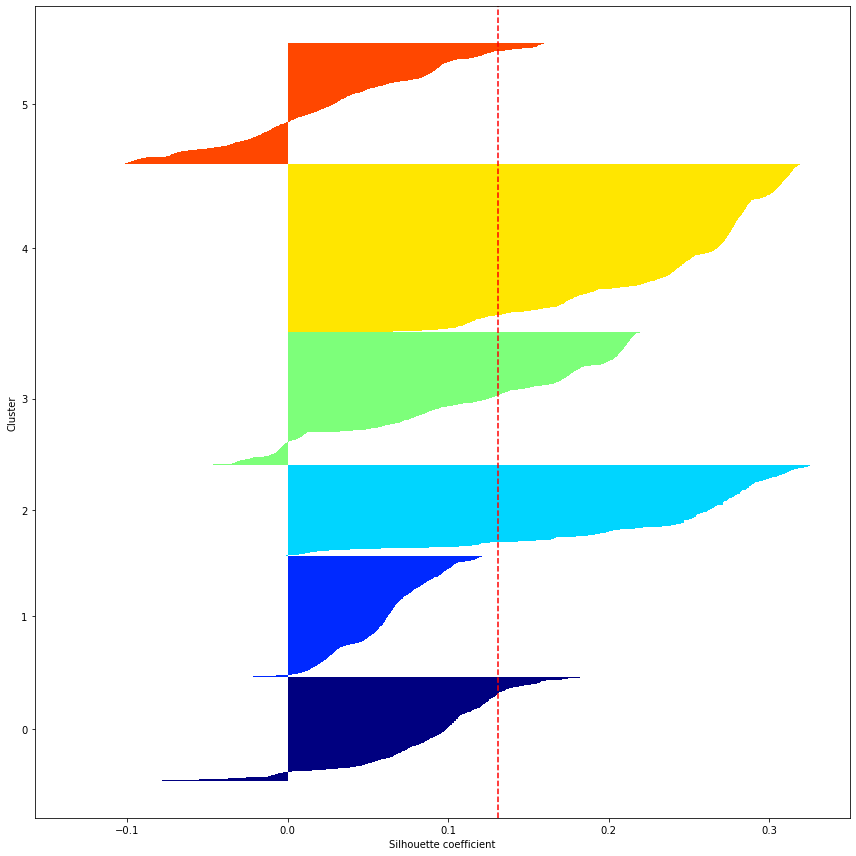



Mean Silhouette Value:  0.1308407242428604
Completeness score:  0.0165445301127643
Homogeneity score:  0.05354370601449618 


----------Cluster Analysis----------

Number of clusters: 7
Size of Cluster 0 =  1558
Size of Cluster 1 =  2077
Size of Cluster 2 =  3285
Size of Cluster 3 =  1559
Size of Cluster 4 =  1618
Size of Cluster 5 =  1940
Size of Cluster 6 =  2268

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.13706            0.60013                   0.50337   
1    0.19650            0.40371                   0.54800   
2    0.11114            0.65967                   0.48762   
3    0.11852            0.54554                   0.51143   
4    0.28518            0.54141                   0.49336   
5    0.10839            0.66134                   0.48532   
6    0.06893            0.56570                   0.50160   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.49484                  0.09166               0.09270   
1                    0.50769                  0.04649               0.05176   
2                    0.48372                  0.05586               0.05689   
3                    0.49087                  0.08110               0.08172   
4                    0.49011                  0.03905               0.05241   
5                    0.49125                  0.06047               0.06294   
6                    0.49950                  0.04338               0.05247   

    adults  children       babies  is_repeated_guest  ...  \
0  0.07434   0.09713  6.73941e-03            0.02054  ...   
1  0.06403   0.00449  7.22195e-04            0.01926  ...   
2  0.06861   0.02029  2.28311e-03            0.00791  ...   
3  0.06897   0.01155  8.01796e-03            0.02502  ...   
4  0.06684   0.00021  1.38778e-17            0.00618  ...   
5  0.07942   0.08677  2.83505e-03            0.00361  ...   
6  0.06183   0.04071  9.92063e-03            0.13845  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.99101              8.98588e-03             -2.60209e-18   
1                  0.97352              2.40732e-02              2.40732e-03   
2                  0.99970             -7.07767e-16              3.04414e-04   
3                  0.98974              1.02630e-02             -2.60209e-18   
4                  0.00494              9.95056e-01             -2.81893e-18   
5                  0.99897              1.03093e-03             -2.81893e-18   
6                  0.97795              1.71958e-02              4.85009e-03   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  6.41849e-04             0.98588        0.01348                 0.05777   
1  1.82956e-01             0.75060        0.06644                 0.01637   
2  3.04414e-04             0.99543        0.00426                 0.04505   
3 -2.35922e-16             0.99423        0.00577                 0.07056   
4  2.92336e-01             0.57108        0.13659                 0.03832   
5  5.15464e-04             0.99536        0.00412                 0.02784   
6 -1.73472e-16             0.29541        0.70459                 0.00176   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0          4.49294e-03                  0.81900                        0.11874  
1          9.62927e-04                  0.06259                        0.92008  
2          5.17504e-03                  0.92146                        0.02831  
3          8.98012e-03                  0.85119                        0.06928  
4          1.21431e-17                  0.92151                        0.04017  
5          8.24742e-03                  0.91186                        0.05206  
6          9.70018e-03                  0.80115                        0.18739  

[7 rows x 82 columns]


Silhouette plot:


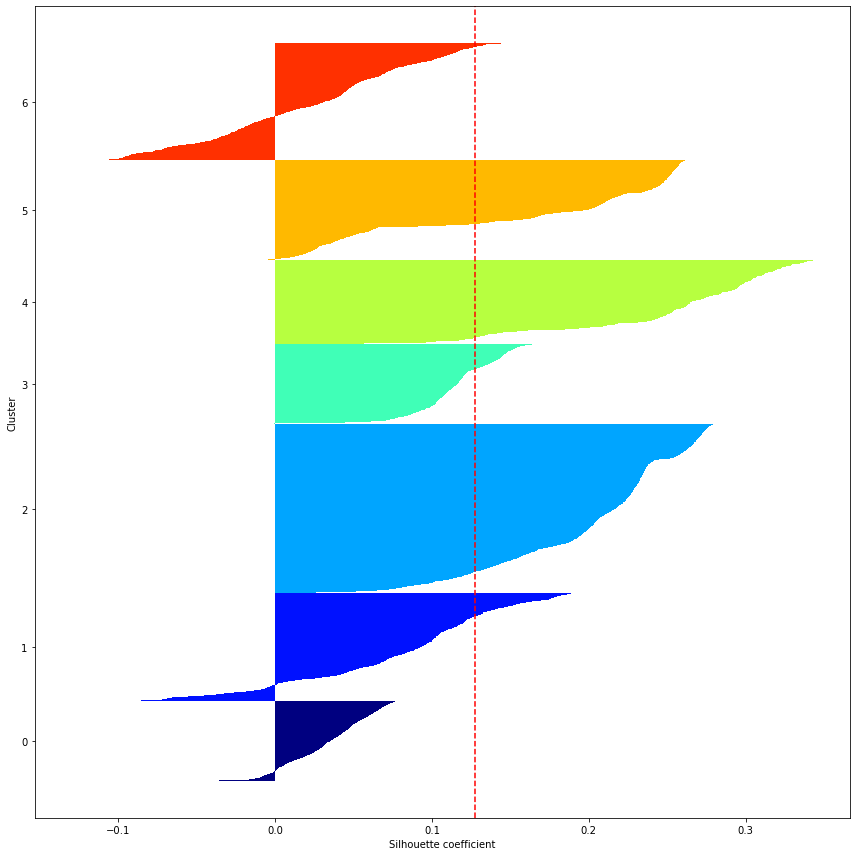



Mean Silhouette Value:  0.12747354496301677
Completeness score:  0.020355623644769293
Homogeneity score:  0.07099105550652084 


----------Cluster Analysis----------

Number of clusters: 8
Size of Cluster 0 =  2334
Size of Cluster 1 =  2290
Size of Cluster 2 =  1949
Size of Cluster 3 =  2389
Size of Cluster 4 =  1252
Size of Cluster 5 =  881
Size of Cluster 6 =  1626
Size of Cluster 7 =  1584

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.12062            0.56727                   0.50575   
1    0.12275            0.65437                   0.48994   
2    0.20587            0.40841                   0.54739   
3    0.11045            0.59439                   0.50281   
4    0.10460            0.72684                   0.47029   
5    0.07047            0.55221                   0.50358   
6    0.28733            0.52921                   0.50167   
7    0.07045            0.59186                   0.49267   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.49253                  0.08266               0.08335   
1                    0.49715                  0.07233               0.07388   
2                    0.50465                  0.04656               0.05263   
3                    0.48681                  0.05907               0.05914   
4                    0.47417                  0.04862               0.05196   
5                    0.48698                  0.03228               0.04546   
6                    0.49293                  0.03963               0.05244   
7                    0.50495                  0.05303               0.05945   

    adults  children       babies  is_repeated_guest  ...  \
0  0.07084   0.06584  8.14053e-03            0.02228  ...   
1  0.07844   0.06827  2.40175e-03            0.00961  ...   
2  0.06448   0.00410  5.13084e-04            0.01642  ...   
3  0.06873   0.03209  3.13939e-03            0.01005  ...   
4  0.06925   0.00879  1.99681e-03            0.00958  ...   
5  0.04889   0.00303  1.13507e-03            0.24972  ...   
6  0.06724   0.00062  1.30104e-17            0.00615  ...   
7  0.06958   0.06124  1.48359e-02            0.06061  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  1.00000             -4.99600e-16             -3.46945e-18   
1                  0.99520              4.80349e-03             -3.46945e-18   
2                  0.97229              2.56542e-02              2.05233e-03   
3                  1.00000             -5.27356e-16             -3.03577e-18   
4                  0.99920              4.16334e-17              7.98722e-04   
5                  0.93303              5.33485e-02              1.36209e-02   
6                  0.00492              9.95080e-01             -2.60209e-18   
7                  0.99684              3.15657e-03             -2.81893e-18   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0 -1.38778e-16             0.99186        0.00814                 0.05398   
1  4.36681e-04             0.99345        0.00611                 0.04498   
2  1.94459e-01             0.73730        0.06824                 0.01591   
3  1.25576e-03             0.99372        0.00502                 0.06279   
4 -1.94289e-16             0.99521        0.00479                 0.02077   
5 -1.31839e-16             0.06697        0.93303                 0.00114   
6  2.90898e-01             0.58057        0.12854                 0.03813   
7 -2.35922e-16             0.49874        0.50126                 0.00189   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0          5.56984e-03                  0.86718                        0.07326  
1          9.17031e-03                  0.87424                        0.07162  
2          5.13084e-04                  0.01437                        0.96921  
3          4.60444e-03                  0.90038                        0.03223  
4          7.18850e-03                  0.94089                        0.03115  
5          6.81044e-03                  0.62316                        0.36890  
6          1.12757e-17                  0.92128                        0.04059  
7          1.07323e-02                  0.88826                        0.09912  

[8 rows x 82 columns]


Silhouette plot:


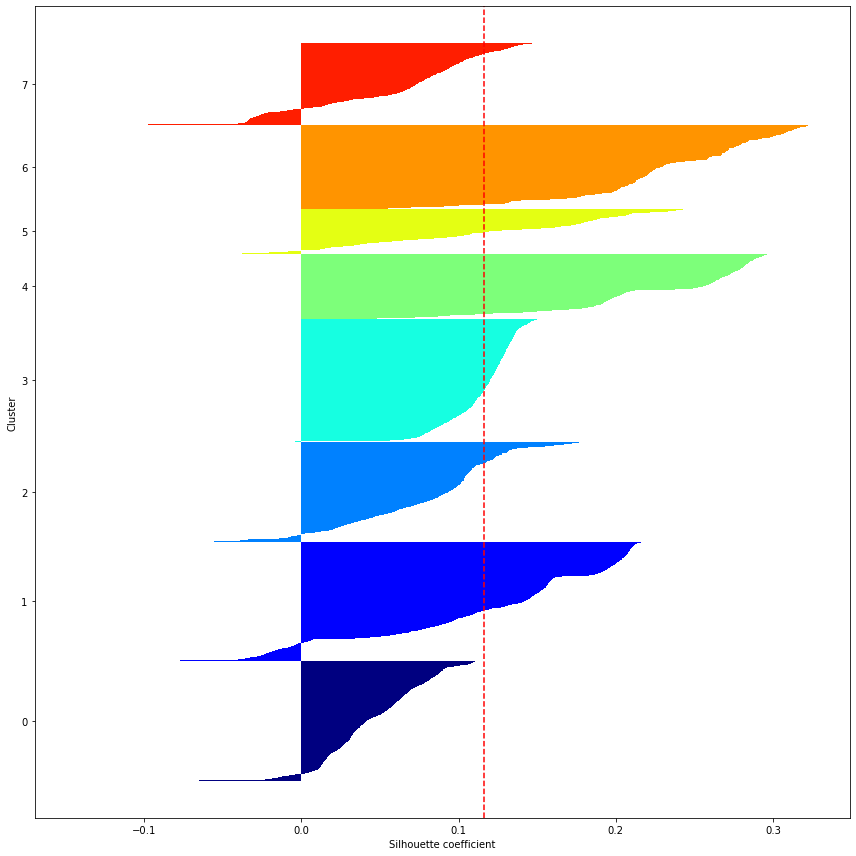



Mean Silhouette Value:  0.11640526710076259
Completeness score:  0.0200291318648752
Homogeneity score:  0.0744125893821951 


----------Cluster Analysis----------

Number of clusters: 9
Size of Cluster 0 =  1565
Size of Cluster 1 =  2493
Size of Cluster 2 =  2176
Size of Cluster 3 =  864
Size of Cluster 4 =  1553
Size of Cluster 5 =  902
Size of Cluster 6 =  1271
Size of Cluster 7 =  2230
Size of Cluster 8 =  1251

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.07075            0.59265                   0.49258   
1    0.11100            0.59467                   0.50269   
2    0.12375            0.65510                   0.49046   
3    0.20630            0.37500                   0.53750   
4    0.28389            0.55344                   0.49646   
5    0.07099            0.54989                   0.50495   
6    0.21178            0.42408                   0.55504   
7    0.11640            0.56906                   0.50370   
8    0.10468            0.72742                   0.47012   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.50560                  0.05288               0.05963   
1                    0.48993                  0.05844               0.05886   
2                    0.49429                  0.07347               0.07459   
3                    0.51362                  0.05093               0.04968   
4                    0.49257                  0.03996               0.05296   
5                    0.48843                  0.03305               0.04579   
6                    0.49381                  0.05094               0.06125   
7                    0.49329                  0.07999               0.08093   
8                    0.47437                  0.04866               0.05192   

    adults  children       babies  is_repeated_guest  ...  \
0  0.06965   0.06113  1.50160e-02            0.06070  ...   
1  0.06895   0.04386  3.00842e-03            0.00963  ...   
2  0.07858   0.05729  2.29779e-03            0.01011  ...   
3  0.06511   0.00270 -7.80626e-18            0.02778  ...   
4  0.06704   0.00064  1.21431e-17            0.00580  ...   
5  0.04936   0.00443  1.10865e-03            0.24390  ...   
6  0.06481   0.00446  1.57356e-03            0.01259  ...   
7  0.07102   0.06846  8.29596e-03            0.02063  ...   
8  0.06925   0.00879  1.99840e-03            0.00959  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0              9.96805e-01              3.19489e-03             -2.81893e-18   
1              1.00000e+00             -5.41234e-16             -3.25261e-18   
2              9.94945e-01              5.05515e-03             -3.25261e-18   
3              9.17824e-01              7.52315e-02              6.94444e-03   
4              4.44089e-16              1.00000e+00             -2.60209e-18   
5              9.36807e-01              5.21064e-02              1.10865e-02   
6              9.60661e-01              3.93391e-02             -2.38524e-18   
7              1.00000e+00             -4.85723e-16             -3.03577e-18   
8              9.99201e-01              4.16334e-17              7.99361e-04   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0 -2.49800e-16             0.50607        0.49393                 0.00192   
1 -3.46945e-17             0.99479        0.00521                 0.06097   
2  4.59559e-04             0.99357        0.00597                 0.04274   
3  5.25463e-01             0.33102        0.14352                 0.02431   
4  2.58210e-01             0.60786        0.13393                 0.03992   
5 -1.38778e-16             0.06541        0.93459                 0.00111   
6 -2.01228e-16             0.98899        0.01101                 0.05193   
7 -1.94289e-16             0.99327        0.00673                 0.03543   
8 -2.08167e-16             0.99520        0.00480                 0.01998   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0          1.08626e-02                  0.89457                        0.09265  
1          5.21460e-03                  0.89130                        0.04252  
2          8.27206e-03                  0.87500                        0.07399  
3          1.15741e-03                  0.01389                        0.96065  
4          1.


Silhouette plot:


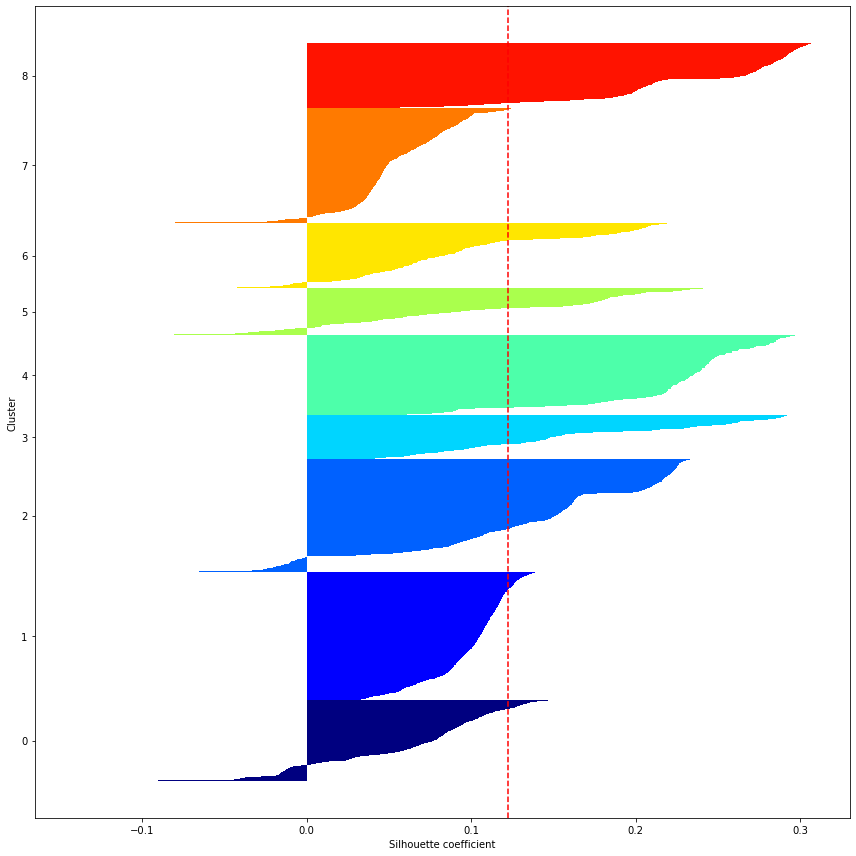



Mean Silhouette Value:  0.1223081638367673
Completeness score:  0.019666632515886146
Homogeneity score:  0.07667402773166006 


----------Cluster Analysis----------

Number of clusters: 10
Size of Cluster 0 =  1115
Size of Cluster 1 =  2280
Size of Cluster 2 =  2255
Size of Cluster 3 =  779
Size of Cluster 4 =  1252
Size of Cluster 5 =  1105
Size of Cluster 6 =  1600
Size of Cluster 7 =  1041
Size of Cluster 8 =  659
Size of Cluster 9 =  2219

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.21542            0.59013                   0.46357   
1    0.12191            0.65241                   0.49141   
2    0.11671            0.56918                   0.50368   
3    0.05789            0.53915                   0.51385   
4    0.10466            0.72764                   0.47019   
5    0.20058            0.46516                   0.50670   
6    0.06929            0.59187                   0.49218   
7    0.21042            0.38521                   0.57871   
8    0.36742            0.42413                   0.56586   
9    0.11195            0.60005                   0.50214   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.48798                  0.04159               0.05478   
1                    0.49861                  0.07229               0.07374   
2                    0.49305                  0.08154               0.08257   
3                    0.47445                  0.03193               0.04323   
4                    0.47463                  0.04862               0.05194   
5                    0.51288                  0.05339               0.05561   
6                    0.50646                  0.05211               0.05886   
7                    0.49657                  0.04569               0.05632   
8                    0.50577                  0.03907               0.04818   
9                    0.48433                  0.05935               0.05950   

    adults     children       babies  is_repeated_guest  ...  \
0  0.06620  2.39163e-03  4.48430e-04            0.01525  ...   
1  0.07848  6.90058e-02  2.41228e-03            0.00965  ...   
2  0.07089  6.79970e-02  8.42572e-03            0.02129  ...   
3  0.04788  3.42319e-03  6.41849e-04            0.26316  ...   
4  0.06925  8.78594e-03  1.99681e-03            0.00958  ...   
5  0.06482  3.01659e-03  4.52489e-04            0.02443  ...   
6  0.06931  6.04167e-02  1.46875e-02            0.06812  ...   
7  0.06429  4.80307e-03  1.44092e-03            0.01153  ...   
8  0.06907  4.16334e-17 -6.93889e-18            0.00152  ...   
9  0.06877  3.34986e-02  2.92925e-03            0.00676  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.13004              8.69955e-01             -2.16840e-18   
1                  0.99605              3.94737e-03             -3.25261e-18   
2                  1.00000             -4.71845e-16             -3.25261e-18   
3                  0.94095              5.90501e-02             -1.30104e-18   
4                  0.99920              4.16334e-17              7.98722e-04   
5                  0.98281              2.71493e-03              1.44796e-02   
6                  0.99687              3.12500e-03             -2.81893e-18   
7                  0.95485              4.51489e-02             -1.95156e-18   
8                  0.01214              9.87860e-01             -6.50521e-19   
9                  1.00000             -4.85723e-16             -3.25261e-18   

       agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0 -1.87350e-16         9.79372e-01        0.02063             3.46945e-17   
1  4.38596e-04         9.95614e-01        0.00395             4.56140e-02   
2 -1.94289e-16         9.92905e-01        0.00710             3.72506e-02   
3 -9.02056e-17         8.08729e-02        0.91913             1.28370e-03   
4 -1.94289e-16         9.95208e-01        0.00479             1.99681e-02   
5  3.45701e-01         4.62443e-01        0.19186             1.99095e-02   
6 -2.35922e-16         4.90000e-01        0.51000             1.87500e-03   
7 -1.73472e-16         9.87512e-01        0.01249             5.76369e-02   
8  7.17754e-01         1.11022e-16        0.28225             9.40819e-02   
9 -1.87350e-16         9.94592e-01        0.00541             6.35421e-02   

   customer_type_Group  cus


Silhouette plot:


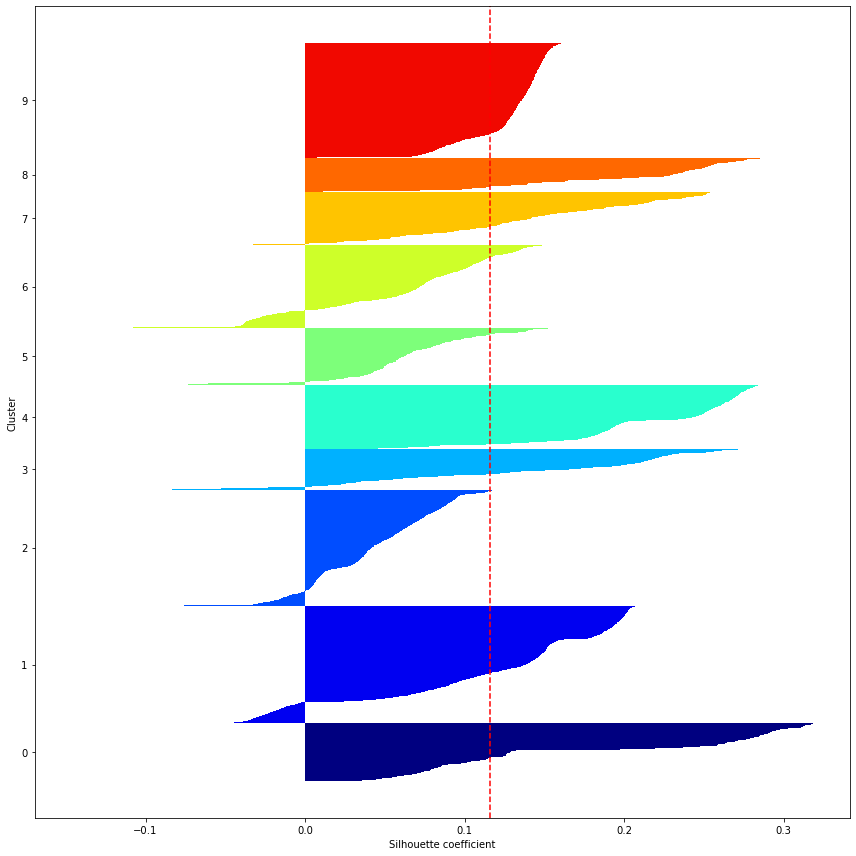



Mean Silhouette Value:  0.11595621133547078
Completeness score:  0.014462472791619366
Homogeneity score:  0.05857855895637752 


----------Cluster Analysis----------

Number of clusters: 11
Size of Cluster 0 =  957
Size of Cluster 1 =  1477
Size of Cluster 2 =  1545
Size of Cluster 3 =  1209
Size of Cluster 4 =  771
Size of Cluster 5 =  1602
Size of Cluster 6 =  1534
Size of Cluster 7 =  1265
Size of Cluster 8 =  1874
Size of Cluster 9 =  1126
Size of Cluster 10 =  945

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.21245            0.37931                   0.58243   
1     0.11467            0.63913                   0.49495   
2     0.11893            0.54757                   0.51138   
3     0.10362            0.72705                   0.46868   
4     0.05817            0.54021                   0.51319   
5     0.06933            0.59114                   0.49310   
6     0.28454            0.55834                   0.49396   
7     0.11048            0.55534                   0.50801   
8     0.12442            0.64381                   0.49376   
9     0.20900            0.42496                   0.51500   
10    0.12400            0.62804                   0.48964   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.50087                  0.04023               0.05248   
1                     0.48905                  0.05962               0.05978   
2                     0.49167                  0.08078               0.08142   
3                     0.47502                  0.04818               0.05155   
4                     0.47289                  0.03186               0.04316   
5                     0.50643                  0.05220               0.05900   
6                     0.49259                  0.03940               0.05271   
7                     0.49636                  0.05761               0.05848   
8                     0.48929                  0.07557               0.07616   
9                     0.51368                  0.05112               0.05373   
10                    0.49552                  0.08241               0.08426   

     adults  children       babies  is_repeated_guest  ...  \
0   0.06301   0.00453  1.56740e-03            0.00731  ...   
1   0.06873   0.09749  2.70819e-03            0.00677  ...   
2   0.06909   0.01165  7.76699e-03            0.02654  ...   
3   0.06914   0.00662  1.65426e-03            0.00993  ...   
4   0.04770   0.00346  6.48508e-04            0.26459  ...   
5   0.06933   0.06055  1.46692e-02            0.06804  ...   
6   0.06698   0.00022  1.21431e-17            0.00587  ...   
7   0.06942   0.05112  3.55731e-03            0.01265  ...   
8   0.07907   0.01281  2.40128e-03            0.01067  ...   
9   0.06509   0.00178  4.44050e-04            0.02398  ...   
10  0.07631   0.14956  7.40741e-03            0.01376  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                   0.94984              5.01567e-02             -1.95156e-18   
1                   1.00000             -1.38778e-16             -2.60209e-18   
2                   0.98964              1.03560e-02             -2.81893e-18   
3                   0.99917              6.93889e-17              8.27130e-04   
4                   0.94034              5.96628e-02             -1.30104e-18   
5                   0.99688              3.12110e-03             -2.60209e-18   
6                   0.00065              9.99348e-01             -2.60209e-18   
7                   0.99921              7.90514e-04             -2.38524e-18   
8                   0.99413              5.86980e-03             -3.03577e-18   
9                   0.92540              6.03908e-02              1.42096e-02   
10                  0.99683              3.17460e-03             -1.95156e-18   

        agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  -1.59595e-16             0.98746        0.01254                 0.01567   
1  -2.15106e-16             0.99255        0.00745                 0.03656   
2  -2.42861e-16             0.99353        0.00647                 0.06926   
3  -1.87350e-16             0.99504        0.00496                 0.02068   
4  -9.71445e-17             0.07912        0.92088                 0.00130   
5  -2.35922e-16             0.49064        0.50936                 0.00187   
6   2.61408e-01             0.6023


Silhouette plot:


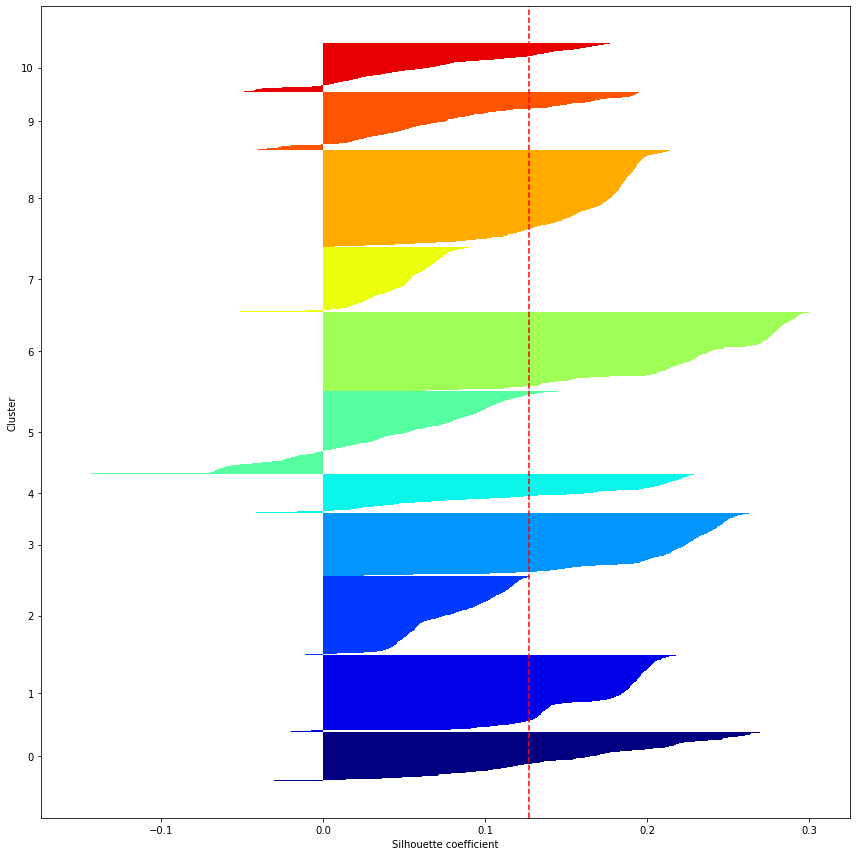



Mean Silhouette Value:  0.12724275770428534
Completeness score:  0.017413474493036908
Homogeneity score:  0.0752377904448279 


----------Cluster Analysis----------

Number of clusters: 12
Size of Cluster 0 =  1328
Size of Cluster 1 =  2509
Size of Cluster 2 =  899
Size of Cluster 3 =  1232
Size of Cluster 4 =  751
Size of Cluster 5 =  931
Size of Cluster 6 =  1252
Size of Cluster 7 =  1838
Size of Cluster 8 =  1042
Size of Cluster 9 =  1021
Size of Cluster 10 =  711
Size of Cluster 11 =  791

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.13225            0.60241                   0.51257   
1     0.11243            0.61558                   0.49753   
2     0.20135            0.51669                   0.52676   
3     0.11256            0.67167                   0.48480   
4     0.05861            0.54461                   0.51055   
5     0.05780            0.52685                   0.49029   
6     0.10577            0.72604                   0.47226   
7     0.20366            0.41730                   0.54424   
8     0.31114            0.52927                   0.48321   
9     0.10663            0.51665                   0.49770   
10    0.15129            0.59494                   0.50903   
11    0.09726            0.65613                   0.49830   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.49885                  0.08763               0.08795   
1                     0.49130                  0.05856               0.05979   
2                     0.47112                  0.04192               0.05665   
3                     0.48785                  0.06362               0.06420   
4                     0.46866                  0.03212               0.04254   
5                     0.51178                  0.03974               0.05150   
6                     0.47516                  0.04897               0.05226   
7                     0.50811                  0.04801               0.05218   
8                     0.51008                  0.04001               0.05043   
9                     0.48240                  0.07591               0.07713   
10                    0.49297                  0.09687               0.09761   
11                    0.51475                  0.06329               0.06745   

     adults     children       babies  is_repeated_guest  ...  \
0   0.07254  6.87751e-02  7.15361e-03            0.00828  ...   
1   0.06976  8.13073e-02  2.98924e-03            0.00638  ...   
2   0.06621  5.19095e-03  5.56174e-04            0.02336  ...   
3   0.08201  1.21753e-02  2.02922e-03            0.00325  ...   
4   0.04764  3.10697e-03  6.65779e-04            0.26498  ...   
5   0.06608  3.68779e-02  9.66702e-03            0.11171  ...   
6   0.06934  8.78594e-03  1.99681e-03            0.00879  ...   
7   0.06384  3.98984e-03  8.16104e-04            0.01578  ...   
8   0.06867  9.02056e-17 -2.60209e-18            0.00096  ...   
9   0.06914  6.26836e-02  9.30460e-03            0.04310  ...   
10  0.07314  1.31271e-02  2.81294e-03            0.02391  ...   
11  0.07159  7.96460e-02  1.89633e-02            0.01391  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                   0.99096              9.03614e-03             -2.60209e-18   
1                   0.99960              3.98565e-04             -3.46945e-18   
2                   0.33148              6.68521e-01             -1.51788e-18   
3                   0.99919              8.11688e-04             -2.38524e-18   
4                   0.94407              5.59254e-02             -1.30104e-18   
5                   0.96778              2.14823e-02              1.07411e-02   
6                   0.99920              4.16334e-17              7.98722e-04   
7                   0.99565              1.08814e-03              3.26442e-03   
8                   0.00768              9.92322e-01             -1.73472e-18   
9                   0.99412              5.87659e-03             -2.16840e-18   
10                  0.98312              1.68776e-02             -1.08420e-18   
11                  1.00000              1.11022e-16             -1.30104e-18   

        agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  -2.15106e-16         9.92470e-01    7.53012e-03             8.35843e-02   
1   1.19570e-03         9.92826e-01    5.97848e-03             6.37704e-02   
2  -1.31839e-16       


Silhouette plot:


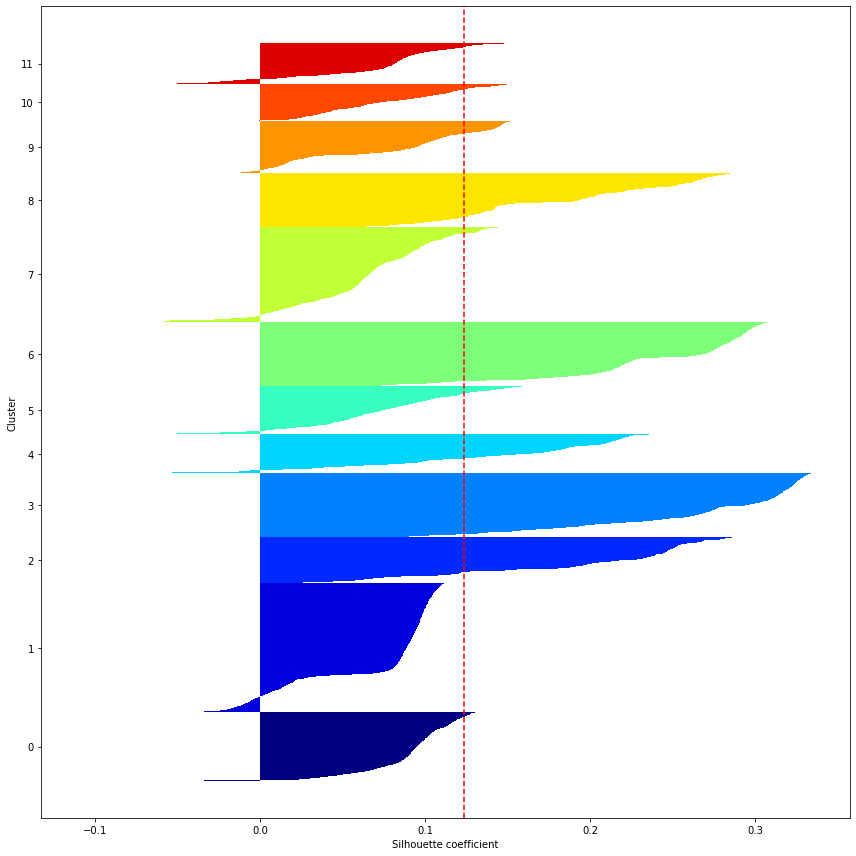



Mean Silhouette Value:  0.12329681817124795
Completeness score:  0.015941302222331637
Homogeneity score:  0.07009803502548105 


----------Cluster Analysis----------

Number of clusters: 13
Size of Cluster 0 =  1459
Size of Cluster 1 =  1563
Size of Cluster 2 =  1230
Size of Cluster 3 =  1239
Size of Cluster 4 =  566
Size of Cluster 5 =  2131
Size of Cluster 6 =  680
Size of Cluster 7 =  909
Size of Cluster 8 =  535
Size of Cluster 9 =  975
Size of Cluster 10 =  883
Size of Cluster 11 =  825
Size of Cluster 12 =  1310

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.27752            0.58259                   0.48371   
1     0.06909            0.59213                   0.49417   
2     0.11231            0.67073                   0.48577   
3     0.10575            0.73043                   0.47049   
4     0.09203            0.43286                   0.52711   
5     0.11691            0.64008                   0.49449   
6     0.03611            0.54779                   0.49587   
7     0.11832            0.62651                   0.48841   
8     0.21769            0.56729                   0.48480   
9     0.21501            0.39487                   0.58130   
10    0.11946            0.56229                   0.50303   
11    0.21837            0.32000                   0.55280   
12    0.13164            0.55534                   0.51973   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.49511                  0.04014               0.05312   
1                     0.50766                  0.05178               0.05881   
2                     0.48835                  0.06387               0.06429   
3                     0.47571                  0.04863               0.05184   
4                     0.50212                  0.04914               0.05353   
5                     0.48993                  0.06097               0.06056   
6                     0.48299                  0.02647               0.03776   
7                     0.49490                  0.08230               0.08424   
8                     0.48523                  0.06343               0.07379   
9                     0.49716                  0.03949               0.05179   
10                    0.48543                  0.08458               0.08477   
11                    0.51927                  0.04705               0.04564   
12                    0.49224                  0.08655               0.08803   

     adults  children       babies  is_repeated_guest  ...  \
0   0.06689   0.00023  9.54098e-18            0.00617  ...   
1   0.06943   0.06163  1.50352e-02            0.06270  ...   
2   0.08205   0.01220  2.03252e-03            0.00325  ...   
3   0.06929   0.00834  2.01776e-03            0.00888  ...   
4   0.06727   0.04770  4.41696e-03            0.03004  ...   
5   0.06942   0.08353  2.58095e-03            0.00469  ...   
6   0.04564   0.00343 -6.93889e-18            0.30735  ...   
7   0.07652   0.15475  8.25083e-03            0.01430  ...   
8   0.06494   0.00436  1.86916e-03            0.02617  ...   
9   0.06317   0.00479  1.53846e-03            0.00718  ...   
10  0.07114   0.01284  2.83126e-03            0.03171  ...   
11  0.06581   0.00283 -6.93889e-18            0.02545  ...   
12  0.06964   0.01196  8.39695e-03            0.02061  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0               6.66134e-16              1.00000e+00             -2.81893e-18   
1               9.97441e-01              2.55918e-03             -2.81893e-18   
2               9.99187e-01              8.13008e-04             -2.16840e-18   
3               9.99193e-01              5.55112e-17              8.07103e-04   
4               9.98233e-01              1.76678e-03              0.00000e+00   
5               1.00000e+00             -4.44089e-16             -2.81893e-18   
6               9.32353e-01              6.76471e-02             -8.67362e-19   
7               9.96700e-01              3.30033e-03             -1.73472e-18   
8               9.60748e-01              9.34579e-03              2.99065e-02   
9               9.50769e-01              4.92308e-02             -1.95156e-18   
10              9.73952e-01              2.60476e-02             -1.51788e-18   
11              8.46061e-01              1.53939e-01             -1.51788e-18   
12              9.89313e-01              1.06870e-02             -2.38524e-18   

        ag


Silhouette plot:


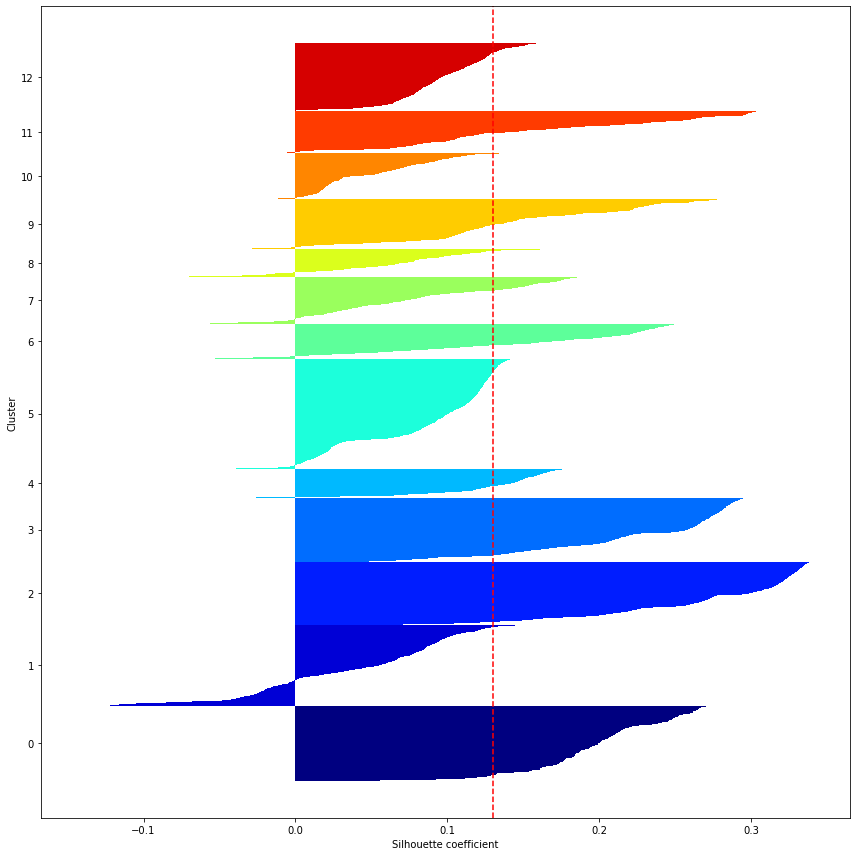



Mean Silhouette Value:  0.1303911791253625
Completeness score:  0.017236767740334908
Homogeneity score:  0.07835551204620336 


----------Cluster Analysis----------

Number of clusters: 14
Size of Cluster 0 =  658
Size of Cluster 1 =  1815
Size of Cluster 2 =  1504
Size of Cluster 3 =  1634
Size of Cluster 4 =  543
Size of Cluster 5 =  971
Size of Cluster 6 =  830
Size of Cluster 7 =  786
Size of Cluster 8 =  1465
Size of Cluster 9 =  515
Size of Cluster 10 =  686
Size of Cluster 11 =  1241
Size of Cluster 12 =  893
Size of Cluster 13 =  764

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.03572            0.55167                   0.48726   
1     0.11744            0.60303                   0.49879   
2     0.28486            0.56383                   0.48881   
3     0.11149            0.64780                   0.49134   
4     0.25801            0.35543                   0.60472   
5     0.13249            0.51493                   0.53141   
6     0.04617            0.51988                   0.49986   
7     0.09580            0.65840                   0.49753   
8     0.11430            0.55222                   0.50920   
9     0.21477            0.55340                   0.49261   
10    0.14875            0.58236                   0.51623   
11    0.10522            0.72804                   0.47129   
12    0.11969            0.63326                   0.48536   
13    0.19942            0.34620                   0.54015   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.48273                  0.02679               0.03742   
1                     0.48426                  0.05885               0.05928   
2                     0.49164                  0.04014               0.05268   
3                     0.49772                  0.06193               0.06326   
4                     0.50362                  0.04742               0.06045   
5                     0.48946                  0.05162               0.05584   
6                     0.50667                  0.03946               0.04970   
7                     0.51671                  0.06290               0.06711   
8                     0.49308                  0.07816               0.07899   
9                     0.48291                  0.06299               0.07379   
10                    0.48542                  0.09575               0.09734   
11                    0.47575                  0.04865               0.05193   
12                    0.49418                  0.08294               0.08505   
13                    0.52120                  0.04851               0.04627   

     adults  children       babies  is_repeated_guest  ...  \
0   0.04537   0.00152 -6.93889e-18            0.30547  ...   
1   0.06791   0.03067  2.47934e-03            0.00606  ...   
2   0.06718   0.00022  1.12757e-17            0.00598  ...   
3   0.07970   0.09731  2.44798e-03            0.00306  ...   
4   0.06759   0.00859  9.20810e-04            0.00921  ...   
5   0.06458   0.00687  3.08960e-03            0.01648  ...   
6   0.06680   0.04096  1.02410e-02            0.12169  ...   
7   0.07162   0.08015  1.90840e-02            0.01145  ...   
8   0.06912   0.01138  8.19113e-03            0.02526  ...   
9   0.06444   0.00583  1.94175e-03            0.02718  ...   
10  0.07294   0.01361  2.91545e-03            0.02187  ...   
11  0.06927   0.00860  2.01450e-03            0.00886  ...   
12  0.07665   0.15677  7.83875e-03            0.01456  ...   
13  0.06511   0.00305 -7.80626e-18            0.02749  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0               9.31611e-01              6.83891e-02             -8.67362e-19   
1               1.00000e+00             -3.33067e-16             -2.81893e-18   
2               6.66134e-16              1.00000e+00             -2.38524e-18   
3               9.98776e-01              1.22399e-03             -2.81893e-18   
4               9.13444e-01              8.65562e-02             -2.16840e-19   
5               9.98970e-01              1.02987e-03             -1.73472e-18   
6               9.73494e-01              2.65060e-02             -1.73472e-18   
7               1.00000e+00              1.11022e-16             -1.30104e-18   
8               9.90444e-01              9.55631e-03             -2.60209e-18   
9               9.59223e-01              9.70874e-03              3.10680e-02   
10              9.66472e-01              3.35277e-


Silhouette plot:


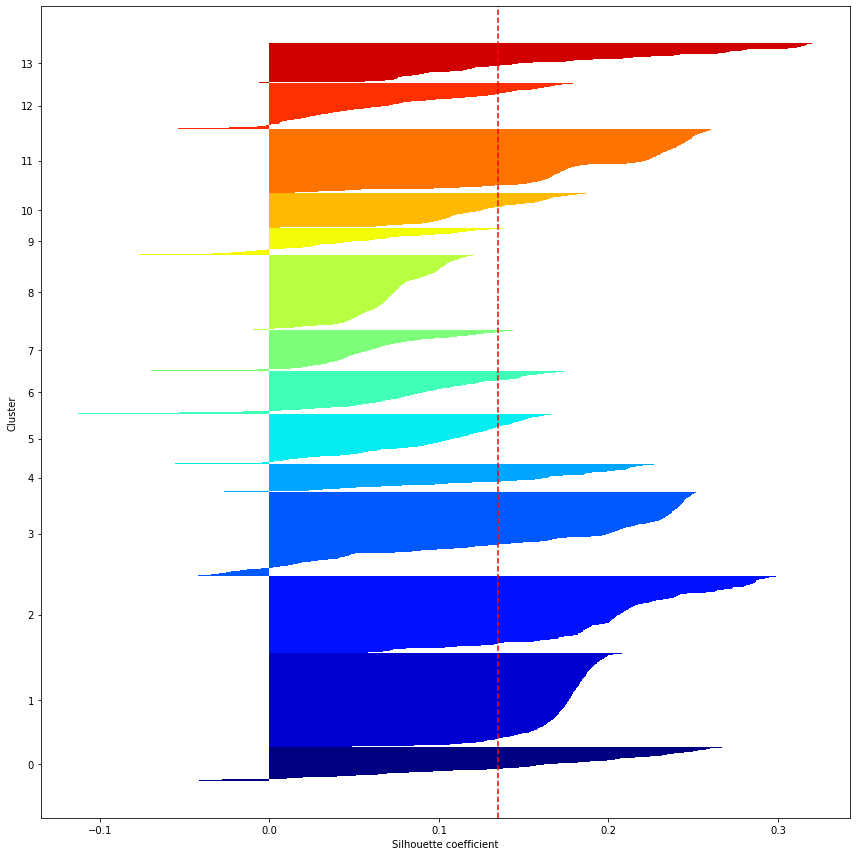



Mean Silhouette Value:  0.13478346832112867
Completeness score:  0.017174913851912877
Homogeneity score:  0.0802602724549679 


----------Cluster Analysis----------

Number of clusters: 15
Size of Cluster 0 =  1303
Size of Cluster 1 =  1455
Size of Cluster 2 =  1257
Size of Cluster 3 =  899
Size of Cluster 4 =  840
Size of Cluster 5 =  968
Size of Cluster 6 =  427
Size of Cluster 7 =  585
Size of Cluster 8 =  1012
Size of Cluster 9 =  892
Size of Cluster 10 =  1175
Size of Cluster 11 =  1226
Size of Cluster 12 =  723
Size of Cluster 13 =  750
Size of Cluster 14 =  793

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.11389            0.63968                   0.49454   
1     0.27779            0.58454                   0.48284   
2     0.12795            0.55609                   0.51888   
3     0.12506            0.57175                   0.49842   
4     0.06946            0.55179                   0.49805   
5     0.16660            0.41632                   0.55459   
6     0.11457            0.69321                   0.47428   
7     0.23236            0.17949                   0.58396   
8     0.11108            0.56621                   0.50737   
9     0.07641            0.59978                   0.48540   
10    0.10319            0.72340                   0.47273   
11    0.11217            0.67129                   0.48541   
12    0.05979            0.58368                   0.50194   
13    0.25141            0.53333                   0.52587   
14    0.12373            0.58701                   0.50204   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.47741                  0.06034               0.05982   
1                     0.49317                  0.03982               0.05321   
2                     0.49480                  0.08448               0.08592   
3                     0.48610                  0.08482               0.08521   
4                     0.48214                  0.03274               0.04485   
5                     0.49852                  0.03816               0.05083   
6                     0.53653                  0.05899               0.06382   
7                     0.49732                  0.05043               0.04474   
8                     0.49058                  0.05892               0.05998   
9                     0.51947                  0.05928               0.06424   
10                    0.47801                  0.04803               0.05109   
11                    0.48850                  0.06372               0.06434   
12                    0.49225                  0.04305               0.05214   
13                    0.51524                  0.05925               0.06513   
14                    0.49142                  0.08504               0.08625   

     adults  children       babies  is_repeated_guest  ...  \
0   0.06847   0.03965  2.68611e-03            0.00460  ...   
1   0.06687   0.00023  8.67362e-18            0.00619  ...   
2   0.06974   0.01246  8.35322e-03            0.02228  ...   
3   0.07115   0.01187  2.78087e-03            0.02892  ...   
4   0.04854   0.00317  1.19048e-03            0.24286  ...   
5   0.06206   0.00379  2.06612e-03            0.01653  ...   
6   0.07546   0.31850  3.51288e-03            0.00703  ...   
7   0.06825   0.00171 -6.07153e-18            0.03590  ...   
8   0.06946   0.02668  3.45850e-03            0.00692  ...   
9   0.07154   0.09380  1.90583e-02            0.07623  ...   
10  0.06906   0.00567  1.70213e-03            0.00936  ...   
11  0.08205   0.01223  2.03915e-03            0.00326  ...   
12  0.06659   0.01890  8.29876e-03            0.06362  ...   
13  0.06607   0.00533  1.33333e-03            0.01200  ...   
14  0.07496   0.16982  8.82724e-03            0.01261  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                   1.00000             -1.38778e-17             -2.16840e-18   
1                   0.00069              9.99313e-01             -2.81893e-18   
2                   0.98886              1.11376e-02             -2.38524e-18   
3                   0.97553              2.44716e-02             -1.73472e-18   
4                   0.92976              5.59524e-02              1.42857e-02   
5                   0.95041              4.95868e-02             -2.16840e-18   
6                   0.99766              2.34192e-03              8.67362e-19   
7                   0.77436              2.25641e-01             -4.33681e-19   
8       


Silhouette plot:


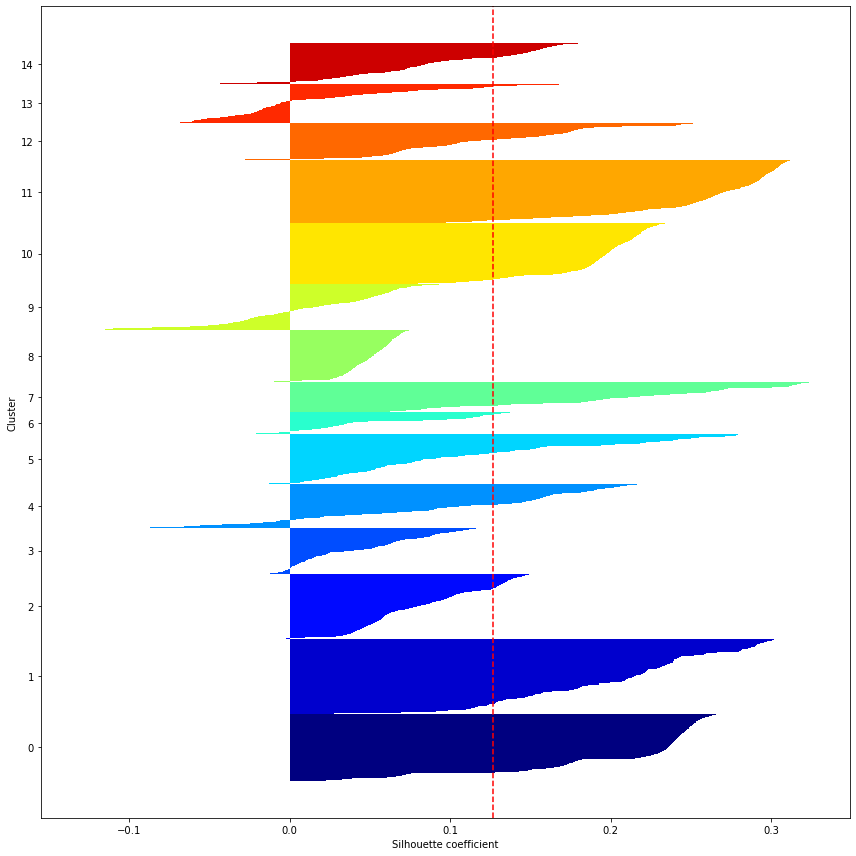



Mean Silhouette Value:  0.12646336219070328
Completeness score:  0.016162323007434958
Homogeneity score:  0.07861447867786978 


----------Cluster Analysis----------

Number of clusters: 16
Size of Cluster 0 =  694
Size of Cluster 1 =  728
Size of Cluster 2 =  706
Size of Cluster 3 =  1035
Size of Cluster 4 =  1227
Size of Cluster 5 =  524
Size of Cluster 6 =  790
Size of Cluster 7 =  746
Size of Cluster 8 =  917
Size of Cluster 9 =  1091
Size of Cluster 10 =  991
Size of Cluster 11 =  850
Size of Cluster 12 =  786
Size of Cluster 13 =  1452
Size of Cluster 14 =  984
Size of Cluster 15 =  784

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.15059            0.59438                   0.50903   
1     0.12247            0.63874                   0.49670   
2     0.21407            0.54391                   0.51746   
3     0.21701            0.40145                   0.56364   
4     0.11219            0.67196                   0.48516   
5     0.08220            0.46374                   0.51651   
6     0.12289            0.65190                   0.48357   
7     0.05836            0.54290                   0.51418   
8     0.08411            0.57306                   0.47882   
9     0.11135            0.73831                   0.47266   
10    0.30327            0.56206                   0.47671   
11    0.20038            0.37118                   0.53652   
12    0.10249            0.49746                   0.50355   
13    0.11444            0.63877                   0.49244   
14    0.14320            0.57215                   0.52300   
15    0.06594            0.61671                   0.50417   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.49313                  0.09717               0.09802   
1                     0.48864                  0.06405               0.06233   
2                     0.46752                  0.04046               0.05482   
3                     0.49771                  0.04088               0.05244   
4                     0.48894                  0.06372               0.06430   
5                     0.50108                  0.04747               0.05157   
6                     0.50422                  0.08323               0.08509   
7                     0.46756                  0.03125               0.04179   
8                     0.52854                  0.06032               0.06810   
9                     0.47385                  0.04921               0.05270   
10                    0.51322                  0.04005               0.05111   
11                    0.51808                  0.05000               0.04826   
12                    0.48227                  0.07196               0.07223   
13                    0.48854                  0.05962               0.05997   
14                    0.48804                  0.08543               0.08829   
15                    0.49307                  0.04177               0.04984   

     adults  children       babies  is_repeated_guest  ...  \
0   0.07317   0.01393  2.88184e-03        2.30548e-02  ...   
1   0.07102   0.05220  2.74725e-03        4.16334e-17  ...   
2   0.06500   0.00189  7.08215e-04        2.54958e-02  ...   
3   0.06302   0.00451  1.44928e-03        6.76329e-03  ...   
4   0.08204   0.01222  2.03749e-03        3.25998e-03  ...   
5   0.06637   0.05153  3.81679e-03        2.29008e-02  ...   
6   0.07600   0.12321  8.22785e-03        1.39241e-02  ...   
7   0.04761   0.00357  6.70241e-04        2.68097e-01  ...   
8   0.07024   0.05707  1.85387e-02        7.96074e-02  ...   
9   0.06980   0.00764  1.83318e-03        5.49954e-03  ...   
10  0.06821   0.00034 -5.20417e-18        2.77556e-17  ...   
11  0.06558   0.00196 -6.93889e-18        3.05882e-02  ...   
12  0.06866   0.06658  1.01781e-02        4.58015e-02  ...   
13  0.06867   0.09780  2.75482e-03        5.50964e-03  ...   
14  0.07039   0.00881  4.57317e-03        8.13008e-03  ...   
15  0.06727   0.05740  8.92857e-03        5.48469e-02  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                   0.98271              1.72911e-02             -6.50521e-19   
1                   1.00000              6.93889e-17             -1.08420e-18   
2                   0.21530              7.84703e-01             -1.08420e-18   
3                   0.95266              4.73430e-02             -2.16840e-18   
4                   0.99919              8.14996e-04             -2.16840e-18   
5                   0.99809              1.9084


Silhouette plot:


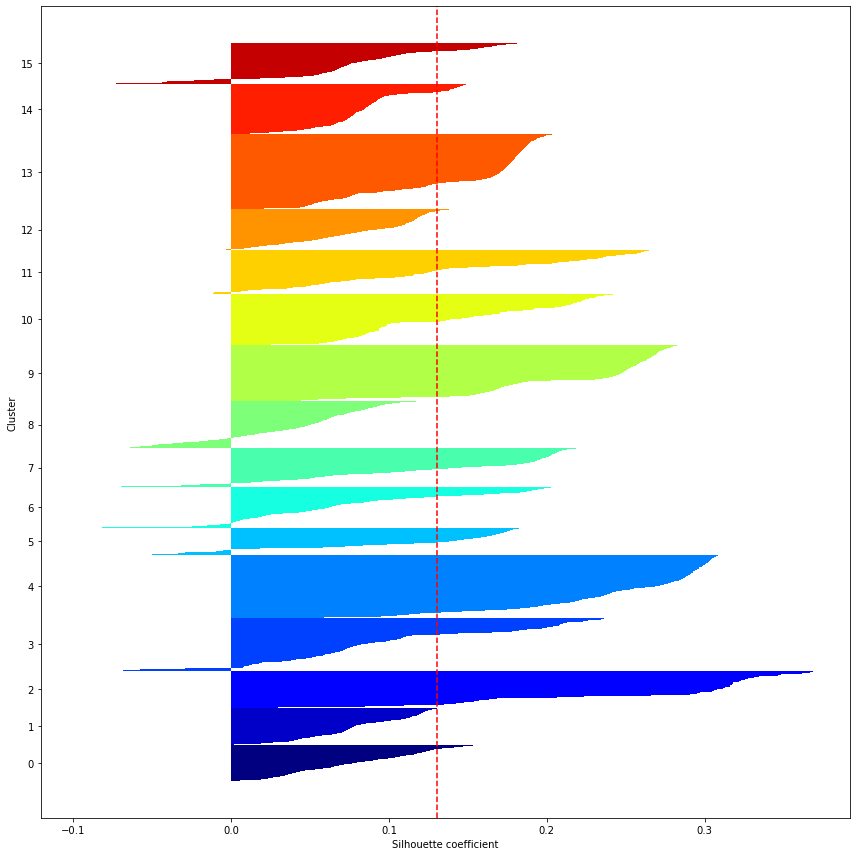



Mean Silhouette Value:  0.1306310592812013
Completeness score:  0.015053667552734037
Homogeneity score:  0.07536526400049233 


----------Cluster Analysis----------

Number of clusters: 17
Size of Cluster 0 =  1225
Size of Cluster 1 =  1029
Size of Cluster 2 =  1204
Size of Cluster 3 =  864
Size of Cluster 4 =  790
Size of Cluster 5 =  1223
Size of Cluster 6 =  592
Size of Cluster 7 =  563
Size of Cluster 8 =  946
Size of Cluster 9 =  815
Size of Cluster 10 =  498
Size of Cluster 11 =  561
Size of Cluster 12 =  397
Size of Cluster 13 =  644
Size of Cluster 14 =  784
Size of Cluster 15 =  694
Size of Cluster 16 =  1476

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.11241            0.67143                   0.48542   
1     0.12212            0.60253                   0.51258   
2     0.10356            0.72508                   0.46936   
3     0.18102            0.50463                   0.53194   
4     0.04135            0.53101                   0.48909   
5     0.10962            0.55724                   0.51032   
6     0.37484            0.47044                   0.55824   
7     0.13072            0.64387                   0.47879   
8     0.23330            0.61099                   0.45253   
9     0.10202            0.50552                   0.50297   
10    0.19729            0.21084                   0.56271   
11    0.10830            0.54100                   0.50727   
12    0.03630            0.54408                   0.50354   
13    0.25697            0.39519                   0.56450   
14    0.09666            0.65816                   0.49715   
15    0.15083            0.59294                   0.51042   
16    0.11495            0.63889                   0.49554   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.48838                  0.06383               0.06435   
1                     0.49683                  0.08181               0.08224   
2                     0.47536                  0.04822               0.05158   
3                     0.50278                  0.04514               0.05405   
4                     0.49549                  0.04066               0.05028   
5                     0.49736                  0.05821               0.05881   
6                     0.49437                  0.03948               0.04949   
7                     0.49964                  0.08603               0.08912   
8                     0.48407                  0.03898               0.05507   
9                     0.48630                  0.07224               0.07316   
10                    0.49772                  0.05422               0.04558   
11                    0.50969                  0.03699               0.05495   
12                    0.48010                  0.03212               0.03520   
13                    0.50342                  0.05008               0.06262   
14                    0.51488                  0.06322               0.06738   
15                    0.49207                  0.09753               0.09820   
16                    0.48828                  0.05954               0.05977   

     adults     children       babies  is_repeated_guest  ...  \
0   0.08212  1.22449e-02  2.04082e-03        3.26531e-03  ...   
1   0.07245  8.68157e-02  7.28863e-03        9.71817e-03  ...   
2   0.06915  6.64452e-03  1.66113e-03        9.96678e-03  ...   
3   0.06044  5.40123e-03  1.15741e-03        1.04167e-02  ...   
4   0.06709  4.30380e-02  1.07595e-02        1.26582e-01  ...   
5   0.06965  5.04225e-02  3.67948e-03        1.22649e-02  ...   
6   0.06907  2.77556e-17 -6.07153e-18        4.16334e-17  ...   
7   0.07519  1.42096e-02  4.44050e-03        1.42096e-02  ...   
8   0.06581  3.52361e-04 -5.20417e-18        7.39958e-03  ...   
9   0.06885  7.48466e-02  1.04294e-02        4.53988e-02  ...   
10  0.06723  2.00803e-03 -5.20417e-18        4.21687e-02  ...   
11  0.05348  3.56506e-03  1.78253e-03        1.35472e-01  ...   
12  0.04618  1.67926e-03 -2.60209e-18        3.29975e-01  ...   
13  0.06723  6.21118e-03  1.55280e-03        7.76398e-03  ...   
14  0.07171  8.03571e-02  1.91327e-02        1.14796e-02  ...   
15  0.07333  1.39289e-02  2.88184e-03        2.30548e-02  ...   
16  0.06878  9.75610e-02  2.71003e-03        5.42005e-03  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0               9.99184e-01              8.16327e-04             -2.38524e-18   
1               9.88338e-01              1.16618e-02             -1.95156e-18   
2               9.99169e-01     


Silhouette plot:


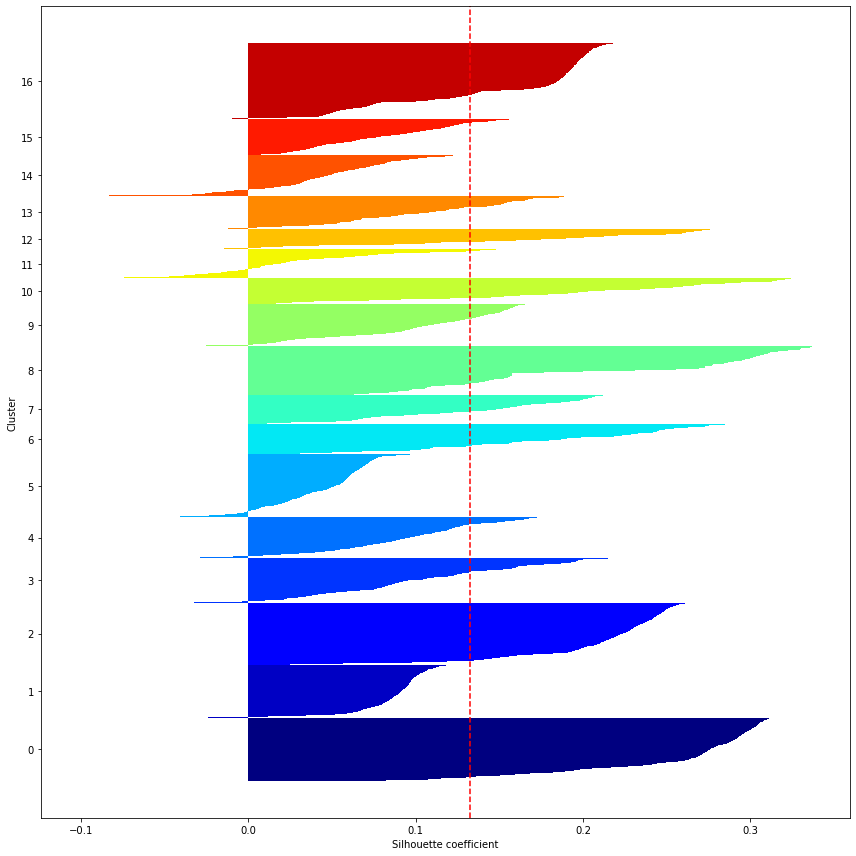



Mean Silhouette Value:  0.13270046750638992
Completeness score:  0.016553380183092447
Homogeneity score:  0.0837941523176528 


----------Cluster Analysis----------

Number of clusters: 18
Size of Cluster 0 =  313
Size of Cluster 1 =  975
Size of Cluster 2 =  862
Size of Cluster 3 =  770
Size of Cluster 4 =  1190
Size of Cluster 5 =  1224
Size of Cluster 6 =  552
Size of Cluster 7 =  807
Size of Cluster 8 =  969
Size of Cluster 9 =  725
Size of Cluster 10 =  336
Size of Cluster 11 =  897
Size of Cluster 12 =  499
Size of Cluster 13 =  1127
Size of Cluster 14 =  859
Size of Cluster 15 =  1018
Size of Cluster 16 =  536
Size of Cluster 17 =  646

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.15755            0.61502                   0.52372   
1     0.12374            0.53590                   0.51438   
2     0.07572            0.60267                   0.48769   
3     0.19829            0.35325                   0.53866   
4     0.10453            0.72353                   0.47519   
5     0.11242            0.67075                   0.48647   
6     0.24658            0.55435                   0.52094   
7     0.11964            0.58736                   0.49190   
8     0.10784            0.57585                   0.51016   
9     0.06011            0.58414                   0.50342   
10    0.11837            0.61310                   0.49954   
11    0.22079            0.38963                   0.58458   
12    0.21198            0.54910                   0.49491   
13    0.11067            0.76797                   0.30894   
14    0.12075            0.37776                   0.74557   
15    0.30347            0.54666                   0.48400   
16    0.12982            0.64646                   0.47991   
17    0.02842            0.55805                   0.48905   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.46454                  0.10803               0.10359   
1                     0.48424                  0.08417               0.08213   
2                     0.52146                  0.05873               0.06383   
3                     0.52130                  0.04821               0.04601   
4                     0.47686                  0.04827               0.05141   
5                     0.48813                  0.06367               0.06440   
6                     0.45556                  0.03770               0.05611   
7                     0.49703                  0.07977               0.08138   
8                     0.49966                  0.06689               0.07193   
9                     0.49191                  0.04310               0.05207   
10                    0.54355                  0.06101               0.06391   
11                    0.50710                  0.03874               0.05028   
12                    0.48029                  0.06212               0.07320   
13                    0.48571                  0.05784               0.05732   
14                    0.47761                  0.05952               0.06153   
15                    0.51081                  0.04009               0.05169   
16                    0.49596                  0.08722               0.09063   
17                    0.48179                  0.02757               0.03611   

     adults     children       babies  is_repeated_guest  ...  \
0   0.07443  1.04366e-01  4.79233e-03        1.91693e-02  ...   
1   0.06974  1.19658e-02  5.12821e-03        3.38462e-02  ...   
2   0.07154  9.55143e-02  1.97216e-02        7.42459e-02  ...   
3   0.06503  1.73160e-03 -6.93889e-18        2.72727e-02  ...   
4   0.06909  6.72269e-03  1.68067e-03        9.24370e-03  ...   
5   0.08206  1.22549e-02  2.04248e-03        3.26797e-03  ...   
6   0.06421  2.08167e-17 -6.07153e-18        1.26812e-02  ...   
7   0.07490  1.35894e-01  4.95663e-03        1.61090e-02  ...   
8   0.06888  1.10079e-02  1.03199e-02        2.27038e-02  ...   
9   0.06662  1.88506e-02  8.27586e-03        6.34483e-02  ...   
10  0.07187  3.95833e-01  4.46429e-03        5.95238e-03  ...   
11  0.06264  2.60126e-03  1.11483e-03        4.45931e-03  ...   
12  0.06443  6.01202e-03  3.00601e-03        2.60521e-02  ...   
13  0.06822  3.93375e-02  3.10559e-03        5.32387e-03  ...   
14  0.06868  3.41482e-02  2.32829e-03        5.82072e-03  ...   
15  0.06807  9.02056e-17 -3.46945e-18        2.08167e-17  ...   
16  0.07559  1.43035e-02  4.66418e-03        1.49254e-02  ...   
17  0.04541  2.57998e-03 -6.93889e-18        3.14241e-01  ...   

    deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_R


Silhouette plot:


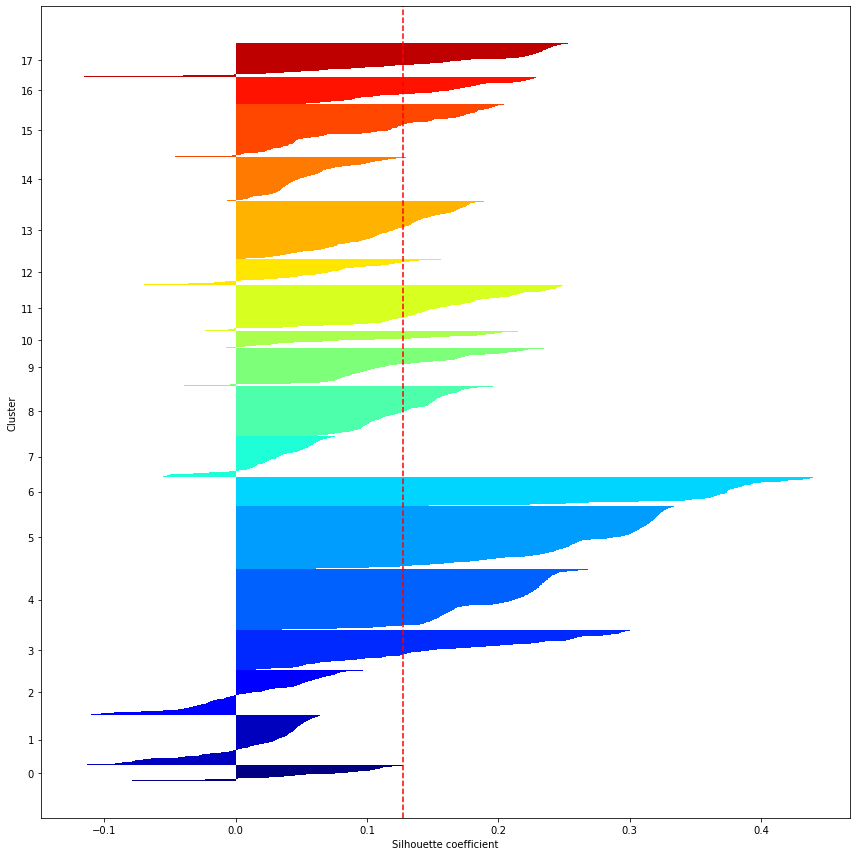



Mean Silhouette Value:  0.12765320156130508
Completeness score:  0.016582252492294492
Homogeneity score:  0.08568346089103383 


----------Cluster Analysis----------

Number of clusters: 19
Size of Cluster 0 =  1056
Size of Cluster 1 =  890
Size of Cluster 2 =  449
Size of Cluster 3 =  1243
Size of Cluster 4 =  666
Size of Cluster 5 =  875
Size of Cluster 6 =  727
Size of Cluster 7 =  677
Size of Cluster 8 =  551
Size of Cluster 9 =  691
Size of Cluster 10 =  252
Size of Cluster 11 =  499
Size of Cluster 12 =  1970
Size of Cluster 13 =  422
Size of Cluster 14 =  470
Size of Cluster 15 =  665
Size of Cluster 16 =  1184
Size of Cluster 17 =  451
Size of Cluster 18 =  567

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0     0.30861            0.52746                   0.48632   
1     0.22142            0.38933                   0.58364   
2     0.04860            0.53341                   0.49336   
3     0.10523            0.72888                   0.47121   
4     0.14162            0.57658                   0.51698   
5     0.13193            0.58114                   0.51811   
6     0.10221            0.50825                   0.50069   
7     0.22067            0.54579                   0.51917   
8     0.12914            0.64428                   0.47690   
9     0.18352            0.38495                   0.53192   
10    0.08070            0.45437                   0.53571   
11    0.22331            0.56713                   0.48520   
12    0.11542            0.60355                   0.50026   
13    0.09300            0.48341                   0.54785   
14    0.09663            0.64681                   0.49484   
15    0.06312            0.59398                   0.49569   
16    0.11315            0.69172                   0.47720   
17    0.01334            0.59091                   0.47250   
18    0.11776            0.62875                   0.49593   

    arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                     0.51158                  0.03954               0.05047   
1                     0.50176                  0.03933               0.05171   
2                     0.52116                  0.04329               0.05217   
3                     0.47664                  0.04862               0.05187   
4                     0.49404                  0.09769               0.09779   
5                     0.48968                  0.08550               0.08657   
6                     0.49033                  0.07325               0.07442   
7                     0.46972                  0.03997               0.05535   
8                     0.49800                  0.08621               0.09020   
9                     0.52793                  0.05056               0.04682   
10                    0.48810                  0.03472               0.04812   
11                    0.48444                  0.06300               0.07350   
12                    0.48667                  0.05933               0.05945   
13                    0.45340                  0.05895               0.06049   
14                    0.51553                  0.06955               0.07261   
15                    0.49719                  0.04492               0.05297   
16                    0.49012                  0.06361               0.06375   
17                    0.46800                  0.02370               0.03243   
18                    0.52046                  0.06779               0.06966   

     adults  children       babies  is_repeated_guest  ...  \
0   0.06843   0.00032 -1.73472e-18        6.93889e-18  ...   
1   0.06334   0.00337  1.68539e-03        8.98876e-03  ...   
2   0.06789   0.06088  1.22494e-02        1.49220e-01  ...   
3   0.06925   0.00885  2.01126e-03        8.84956e-03  ...   
4   0.07352   0.01401  3.00300e-03        2.25225e-02  ...   
5   0.07086   0.00952  5.14286e-03        8.00000e-03  ...   
6   0.06766   0.03668  1.16919e-02        4.67675e-02  ...   
7   0.06494   0.00148 -6.93889e-18        1.92024e-02  ...   
8   0.07549   0.01452  4.53721e-03        1.45191e-02  ...   
9   0.06464   0.00193 -6.93889e-18        3.03907e-02  ...   
10  0.05306   0.00794  8.67362e-19        5.55556e-02  ...   
11  0.06517   0.00401  3.00601e-03        2.40481e-02  ...   
12  0.06821   0.03283  2.79188e-03        6.09137e-03  ...   
13  0.07074   0.03476  3.55450e-03        1.18483e-02  ...   
14  0.07439   0.12057  2.44681e-02        1.70213e-02  ...   
15  0.06695   0.01805  9.02256e-03        4.66165e-02  ...   
16  0.08246   0.01182  2.11149e-03        3.37838e-03  ...   
17  0.04221   0.00148 -4.33681e-18        4.27


Silhouette plot:


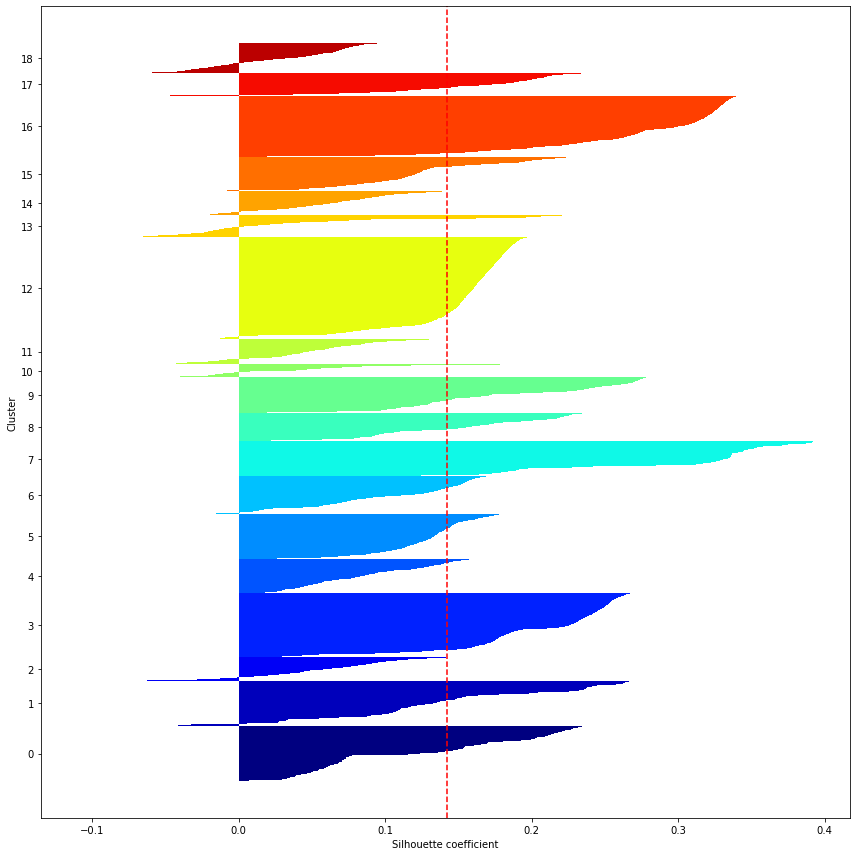



Mean Silhouette Value:  0.14235909452362555
Completeness score:  0.016165968848387748
Homogeneity score:  0.08353101411455131 



In [117]:
silhouettes_mean, completeness , homogeneity  =[],[],[]
k_range= list(range(2,20))  # trying k=2 all the way to k=20
for K in k_range:   
    sil,comp,hmg,_,_=cluster_analysis(X_norm,X_ssf.columns,y,plot_silhouettes,k=K)
    silhouettes_mean.append(sil.mean())
    completeness.append(comp)
    homogeneity.append(hmg)

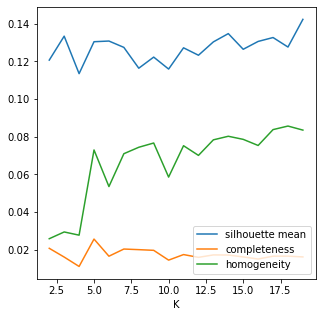

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.plot(k_range, silhouettes_mean, label = "silhouette mean")
ax.plot(k_range, completeness, label="completeness")
ax.plot(k_range, homogeneity, label = "homogeneity")
plt.xlabel("K")
plt.legend(loc='lower right')
plt.show(); 

<a name="4.2"></a>
### 4.2 Qualitative Analysis of Clusters

In [119]:
# Best K: 

# Based on the above scores plot, k=5, k=7, and k=2 have relatively higher scores (Sil.mean, completeness and homogeneity)
# compared to others; However, we'll look at centroids for k=2 to see if we can detect interesting patterns:


----------Cluster Analysis----------

Number of clusters: 2
Size of Cluster 0 =  6104
Size of Cluster 1 =  8201

Cluster centroids:


lead_time  arrival_date_year  arrival_date_week_number  \
0    0.17278            0.48648                   0.52169   
1    0.11522            0.64181                   0.48953   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                    0.49641                  0.04530               0.05394   
1                    0.49122                  0.06727               0.06863   

    adults  children   babies  is_repeated_guest  ...  \
0  0.06369   0.01092  0.00377            0.06193  ...   
1  0.07260   0.05361  0.00451            0.01097  ...   

   deposit_type_No Deposit  deposit_type_Non Refund  deposit_type_Refundable  \
0                  0.71494                  0.28244                  0.00262   
1                  0.99902                  0.00085                  0.00012   

   agent_1  agent_listed_other  agent_unknown  customer_type_Contract  \
0  0.14007             0.55013        0.30980                 0.03539   
1  0.00012             0.98549        0.01439                 0.03487   

   customer_type_Group  customer_type_Transient  customer_type_Transient-Party  
0              0.00508                  0.56062                        0.39892  
1              0.00573                  0.90416                        0.05524  

[2 rows x 82 columns]


Silhouette plot:


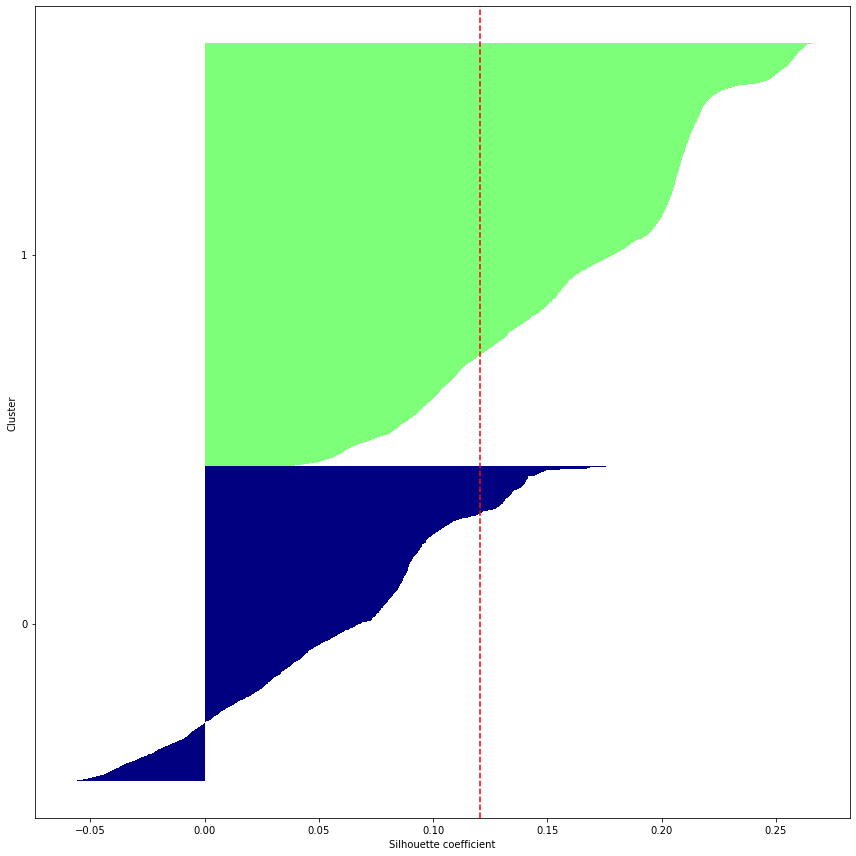



Mean Silhouette Value:  0.120709553994198
Completeness score:  0.020741610562666327
Homogeneity score:  0.02583576722378519 



In [120]:
sil,comp,hmg,clust,cent=cluster_analysis(X_norm,X_ssf.columns,y,plot_silhouettes,k=2)

In [121]:
# Analysis of Cluster centroids 0 and 1:

cent.T   # centroid 0: shows characteristics of profit; Centroid 1: loss

0        1
lead_time                       0.17278  0.11522
arrival_date_year               0.48648  0.64181
arrival_date_week_number        0.52169  0.48953
arrival_date_day_of_month       0.49641  0.49122
stays_in_weekend_nights         0.04530  0.06727
stays_in_week_nights            0.05394  0.06863
adults                          0.06369  0.07260
children                        0.01092  0.05361
babies                          0.00377  0.00451
is_repeated_guest               0.06193  0.01097
previous_cancellations          0.00641  0.00040
previous_bookings_not_canceled  0.00439  0.00028
booking_changes                 0.01431  0.01227
days_in_waiting_list            0.01229  0.00007
adr                             0.16969  0.22445
required_car_parking_spaces     0.00635  0.00886
total_of_special_requests       0.04980  0.15986
hotel_City Hotel                0.69954  0.63419
hotel_Resort Hotel              0.30046  0.36581
arrival_date_month_April        0.08011  0.09474
arrival_date_month_August       0.08322  0.13730
arrival_date_month_December     0.05865  0.05463
arrival_date_month_February     0.07225  0.06938
arrival_date_month_January      0.04931  0.05036
arrival_date_month_July         0.08077  0.12498
arrival_date_month_June         0.08748  0.09609
arrival_date_month_March        0.07946  0.08255
arrival_date_month_May          0.09469  0.10230
arrival_date_month_November     0.06291  0.05158
arrival_date_month_October      0.12336  0.06987
arrival_date_month_September    0.12779  0.06621
meal_BB                         0.79800  0.75503
meal_FB                         0.01212  0.00171
meal_HB                         0.16268  0.09511
meal_SC                         0.02720  0.14815
country_DEU                     0.05292  0.06438
country_FRA                     0.05374  0.11413
country_PRT                     0.71298  0.17327
country_listed_other            0.17317  0.64663
country_unknown                 0.00721  0.00159
market_segment_Aviation         0.00344  0.00098
market_segment_Complementary    0.01245  0.00122
market_segment_Corporate        0.10174  0.00159
market_segment_Direct           0.16497  0.06231
market_segment_Groups           0.37385  0.00768
market_segment_Offline TA/TO    0.32208  0.11243
market_segment_Online TA        0.02146  0.81380
distribution_channel_Corporate  0.13041  0.00268
distribution_channel_Direct     0.20085  0.06414
distribution_channel_GDS        0.00082  0.00219
distribution_channel_TA/TO      0.66792  0.93098
distribution_channel_Undefined  0.00000  0.00000
reserved_room_type_A            0.90924  0.57469
reserved_room_type_B            0.00459  0.01256
reserved_room_type_C            0.00737  0.00988
reserved_room_type_D            0.03096  0.25948
reserved_room_type_E            0.02801  0.07426
reserved_room_type_F            0.01016  0.03597
reserved_room_type_G            0.00721  0.02622
reserved_room_type_H            0.00246  0.00695
reserved_room_type_L            0.00000  0.00000
assigned_room_type_A            0.78866  0.48957
assigned_room_type_B            0.01638  0.01853
assigned_room_type_C            0.02179  0.02170
assigned_room_type_D            0.09731  0.30021
assigned_room_type_E            0.04178  0.08365
assigned_room_type_F            0.01622  0.04170
assigned_room_type_G            0.00967  0.03158
assigned_room_type_H            0.00328  0.00817
assigned_room_type_I            0.00360  0.00280
assigned_room_type_K            0.00131  0.00207
assigned_room_type_L            0.00000  0.00000
deposit_type_No Deposit         0.71494  0.99902
deposit_type_Non Refund         0.28244  0.00085
deposit_type_Refundable         0.00262  0.00012
agent_1                         0.14007  0.00012
agent_listed_other              0.55013  0.98549
agent_unknown                   0.30980  0.01439
customer_type_Contract          0.03539  0.03487
customer_type_Group             0.00508  0.00573
customer_type_Transient         0.56062  0.90416
customer_type_Transi

In [122]:
2.14746e-03

0.00214746

### Detecting patterns among cluster centroids:


**centroid 0:** has characteristics of a profit (Revenue=1) class <br>
**Centroid 1:** has characteristics of revenue loss (Revenue=0) class 

We can't conclude that the above finding holds for the majority of the data because the homogeneity and completeness scores are not high.

<br>

    centroid 1: 
-----------------
        
**higher lead-time:**
It means reservations are made well ahead of the arrival date on average in this cluster, and thus they are 
more probable to get canceled (because guests have more time to find better rates elsewhere) and result in 
revenue loss.
<br>
**lower stays_in_weekend_nights:**
Meaning those who were unable to book for the weekend are more likely to cancel their reservation and this 
would result in revenue loss for the hotel.
<br>
**lower number of children:**
Those with less or no children are more likely to cancel and thus more likely to result in revenue loss for 
the hotels.
<br>
**higher previous_cancellations:**
Meaning that those guests on average canceled past reservations frequently so they are highly probably to           do it again and it results in revenue loss for the hotel.
<br>
**higher days_in_waiting_list:**
Meaning that those who were on waitlist for a long time were highly probable to find offers elsewhere and 
call to request to be removed from waitlist, resulting in a revenue loss for the hotel.
<br>
**lower number of total_of_special_requests:**
Meaning that guests who had little to no special requests were more likely to cancel because little to no
special accomodations were available to them thus such reservations would result in profit for the hotels.
<br>
**higher agent_1:**
Meaning that a lot of guests booked through this agent. From the exploratory data analysis steps, we know           that majority of reservations booked through this agent get canceled, and so will the reservations in this         cluster (revenue loss case).       
<br>

    centroid 0:  
-----------------

**lower lead-time:**
It means reservations are made closer to the arrival date on average, and thus they are less probable to
get canceled (because guests don't have much time to find better rates elsewhere) and result in a profit.
<br>
**higher stays_in_weekend_nights:**
Meaning those who stay over the weekend are less likely to cancel their reservation and this would result           in revenue for the hotel.
<br>
**higher number of children:**
Those with more children are less likely to cancel and thus more likely to result in profit for the hotels
<br>
**lower previous_cancellations:**
Meaning that those guests rarely canceled any reservations in the past so they are highly probably to stay
thus more likely to result in profit.
<br>
**lower days_in_waiting_list:**
Meaning that those who did not go on waitlist or were on waitlist for a short time were highly probable to 
come and stay at the hotel, resulting in profit for the hotel.
<br>
**higher number of total_of_special_requests:**
Meaning that guests who had higher number of special requests were more likely to come and stay because             their many requests would be fulfilled, thus such reservations would result in profit for the hotels.
<br>
**low agent_1:**
Meaning that very few guests booked through this agent. From the exploratory data analysis steps, we know           that majority of reservations booked through this agent get canceled, and since these guests did not book           through this agent, they are more likely to stay and thus that translates to revenue.
<br>

<a name="5"></a>
## 5 - Comparison and Conclusion

Below are the Overall Accuracies for each classifier: 

#### KNN : 0.80(+/- 0.01) 

#### Decision Trees : 0.82 (+/- 0.02)  

#### Random Forest : : 0.85 (+/- 0.02)  

#### SVM: 0.79 (+/- 0.01) 

#### LDA: 0.78 (+/- 0.02)  

#### Naïve Bayes: 0.53 (+/- 0.03) 

Based on our analysis of each classifier, we conclude that Random Forest, being an ensemble model, outperformed the simple classifiers with an overall accuracy of 85%. 
Furthermore, the random forest is useful in handling larger datasets and can provide a higher level of accuracy. 

In addition, the results, and observations from the unsupervised knowledge discovery (clustering) helped us in pattern recognition in the sense that the findings agreed with the information we had previously obtained from exploratory data analysis and visualizations. 
